In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
from scipy.interpolate import lagrange
from scipy.spatial.distance import euclidean
from statistics import median
from statistics import mean
import random
import geopandas as gpd
from zipfile import ZipFile
import pycountry

In [120]:
df = pd.read_csv("energy.csv",  sep=',', encoding = 'latin1')
df.head()

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


In [121]:
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


In [4]:
df.shape

(55440, 10)

In [123]:
dff = df[df.duplicated()]
dff.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission


In [122]:
valNuls = df.isnull().sum()
valNuls

Country                            0
Energy_type                        0
Year                               0
Energy_consumption             11153
Energy_production              11151
GDP                            15414
Population                      9426
Energy_intensity_per_capita     5082
Energy_intensity_by_GDP         5082
CO2_emission                    3826
dtype: int64

In [124]:
df.describe()

,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
count,55440.0000,44287.000000,4.428900e+04,40026.000000,4.601400e+04,50358.000000,50358.000000,51614.000000
mean,1999.5000,1.537811,1.532700e+00,827.144126,6.263020e+04,71.898914,3.695104,78.800082
std,11.5435,15.456596,1.530356e+01,5981.703144,4.562088e+05,113.728738,4.590735,902.221463
min,1980.0000,-0.163438,-1.000000e-39,0.124958,1.147100e+01,0.000000,0.000000,-0.005130
25%,1989.7500,0.000000,0.000000e+00,9.737780,1.141950e+03,3.799939,0.899446,0.000000
50%,1999.5000,0.018381,5.121971e-04,47.757100,6.157680e+03,29.779260,2.987593,0.000000
75%,2009.2500,0.209422,1.125410e-01,263.687100,2.004290e+04,95.523627,4.969454,4.318822
max,2019.0000,601.040490,6.115090e+02,127690.247059,7.714631e+06,1139.320598,166.913605,35584.933498


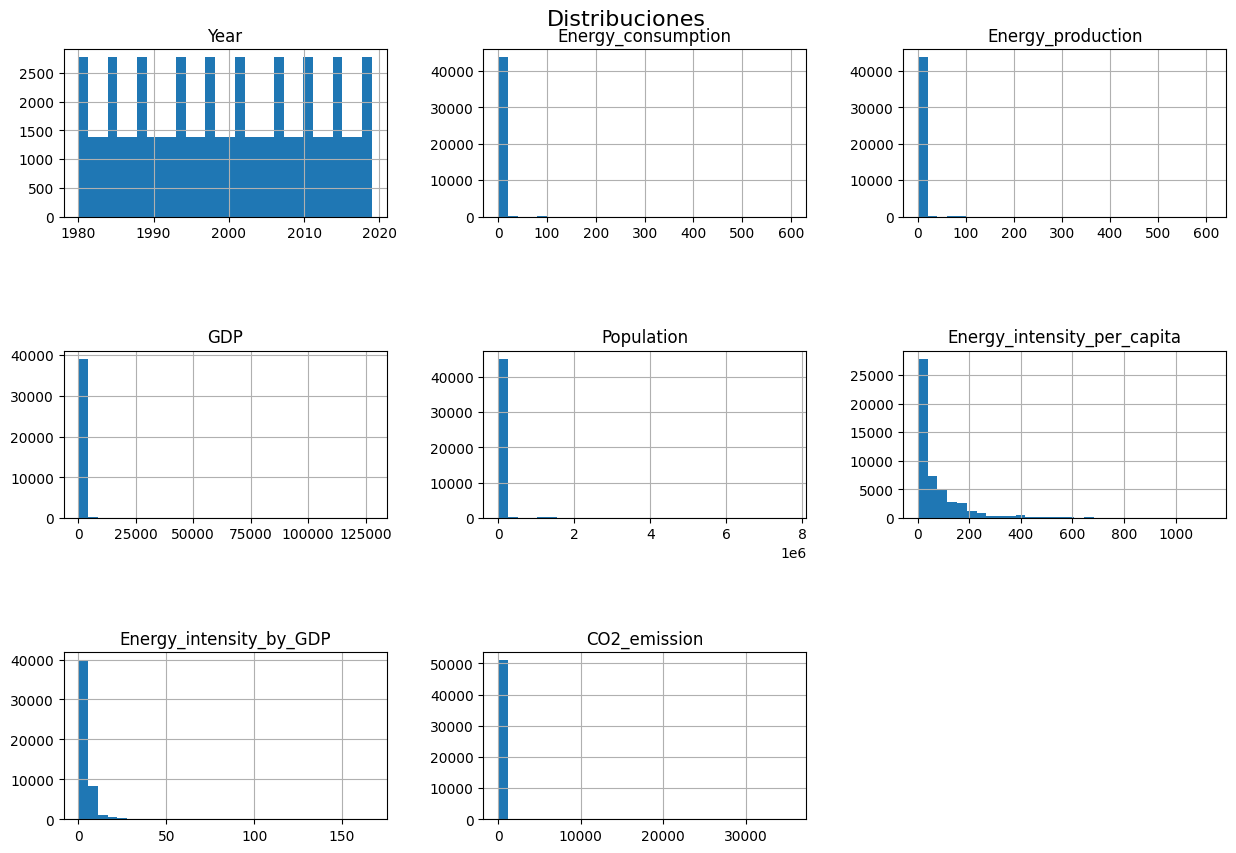

In [125]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribuciones', x=0.5, y=0.92, fontsize=16)
plt.subplots_adjust(hspace=0.8)
plt.show()

/tmp/ipykernel_41/2291632263.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


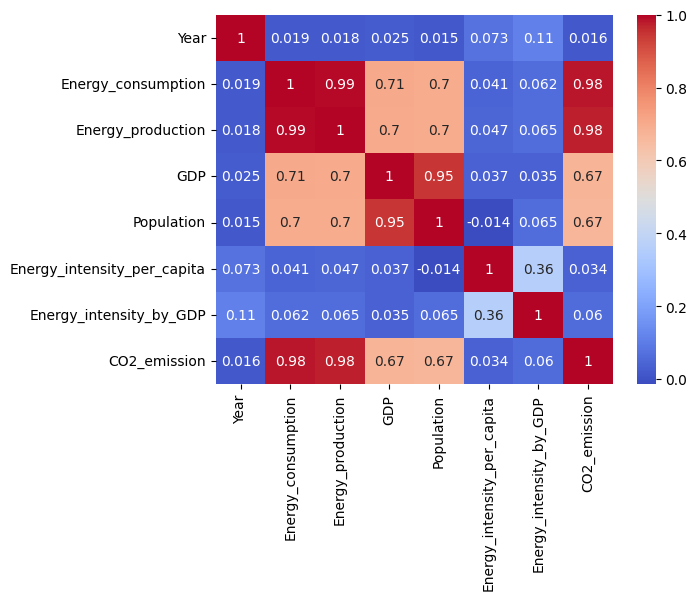

In [6]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [7]:
def knn_u(x_values, X, Y, k):
    results = []
    for x in x_values:
        dis = [euclidean([x], [xt]) for xt in X]
        k_i = np.argsort(dis)[:k]
        knl = [Y[i] for i in k_i]
        ans = np.mean(knl)
        results.append(ans)
    return np.array(results)

In [113]:
def interpolate_u(x_value, X, Y, k):
    results = []
    for i in range(0, 1000, 1):
        ans = 0
        a = list(zip(X, Y))
        random.shuffle(a)
        x, y = zip(*a)
        for i in range(0, len(y), k):
            res = y[i]
            for j in range(0, len(x), k):
                if(i != j):
                    res *= (x_value - x[j]) / (x[i] - x[j])
            ans += res
        results.append(ans)
    mediana = 0
    if results:
        mediana = median(results)
    results = [valor for valor in results if mediana * 0.5 <= valor <= mediana * 1.25]
    ress = 0
    if results:
        ress = mean(results)
    return np.array(ress)

In [9]:
def interpolation_u(x_values, X, Y, k):
    results = []
    for x in x_values:
        results.append(interpolate_u(x, X, Y, k))
    return np.array(results)

In [10]:
df

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...
55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,Zimbabwe,nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000


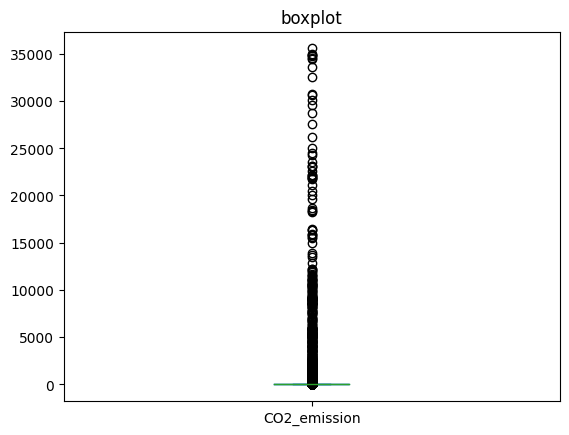

In [11]:
ax = df[['CO2_emission']].plot(kind='box', title='boxplot')
plt.show()

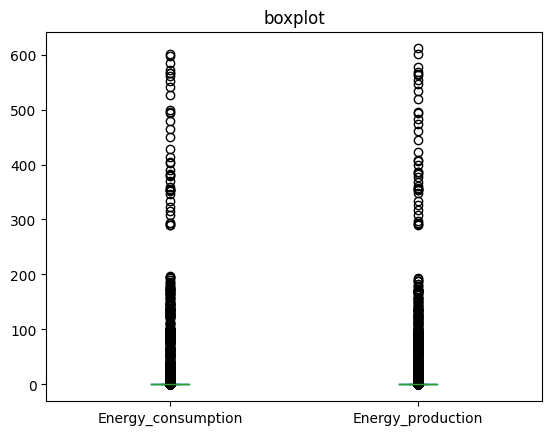

In [12]:
ax = df[['Energy_consumption', 'Energy_production']].plot(kind='box', title='boxplot')
plt.show()

In [140]:
Arg = df[df['Country'] == 'Argentina']
Arg

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
48,Argentina,all_energy_types,1980,1.713088,1.597946,453.819,27951.93,61.286935,3.774827,NaN
49,Argentina,coal,1980,0.034096,0.008735,453.819,27951.93,61.286935,3.774827,NaN
50,Argentina,natural_gas,1980,0.368334,0.287280,453.819,27951.93,61.286935,3.774827,NaN
51,Argentina,petroleum_n_other_liquids,1980,1.102052,1.095156,453.819,27951.93,61.286935,3.774827,NaN
52,Argentina,nuclear,1980,0.025889,0.025889,453.819,27951.93,61.286935,3.774827,0.000000
...,...,...,...,...,...,...,...,...,...,...
54103,Argentina,coal,2019,0.021913,0.000493,833.501,44832.70,79.083060,4.253753,3.045990
54104,Argentina,natural_gas,2019,1.825878,1.677434,833.501,44832.70,79.083060,4.253753,98.150880
54105,Argentina,petroleum_n_other_liquids,2019,1.258251,1.304009,833.501,44832.70,79.083060,4.253753,90.161788
54106,Argentina,nuclear,2019,0.092627,0.092627,833.501,44832.70,79.083060,4.253753,0.000000


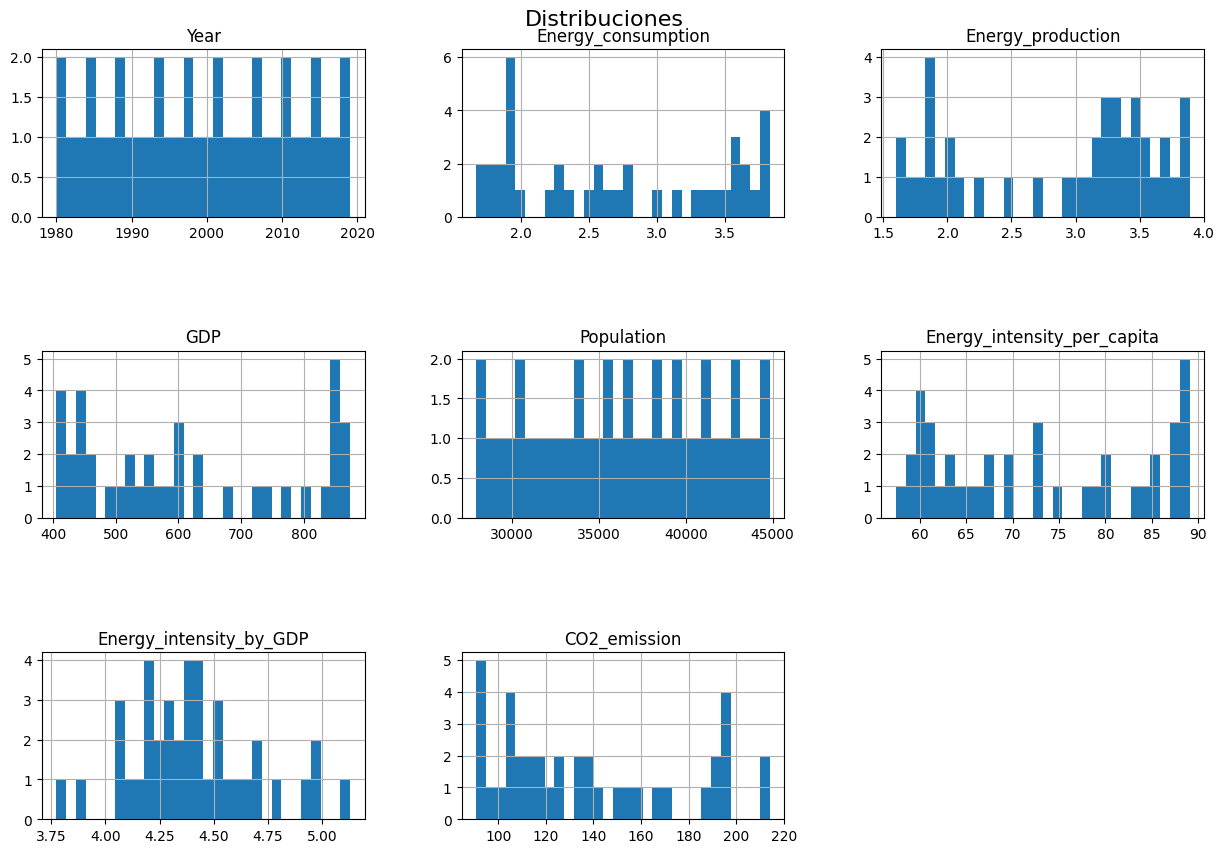

In [131]:
Arg.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribuciones', x=0.5, y=0.92, fontsize=16)
plt.subplots_adjust(hspace=0.8)
plt.show()

In [14]:
Mex = df[df['Country'] == 'Mexico']
Mex

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
798,Mexico,all_energy_types,1980,3.801224,5.713649,984.750,67967.05,55.927459,3.860091,NaN
799,Mexico,coal,1980,0.088556,0.065223,984.750,67967.05,55.927459,3.860091,NaN
800,Mexico,natural_gas,1980,0.843744,0.950400,984.750,67967.05,55.927459,3.860091,NaN
801,Mexico,petroleum_n_other_liquids,1980,2.680407,4.514688,984.750,67967.05,55.927459,3.860091,NaN
802,Mexico,nuclear,1980,NaN,NaN,984.750,67967.05,55.927459,3.860091,0.000000
...,...,...,...,...,...,...,...,...,...,...
54853,Mexico,coal,2019,0.416173,0.207908,2384.142,127745.80,62.518639,3.349840,45.109508
54854,Mexico,natural_gas,2019,3.019191,0.985764,2384.142,127745.80,62.518639,3.349840,154.494922
54855,Mexico,petroleum_n_other_liquids,2019,3.794168,3.994546,2384.142,127745.80,62.518639,3.349840,256.543908
54856,Mexico,nuclear,2019,0.109517,0.109517,2384.142,127745.80,62.518639,3.349840,0.000000


In [15]:
Peru = df[df['Country'] == 'Peru']
Peru

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
972,Peru,all_energy_types,1980,0.402492,0.539135,NaN,17547.6,22.937132,0.000000,NaN
973,Peru,coal,1980,0.002621,0.001308,NaN,17547.6,22.937132,0.000000,NaN
974,Peru,natural_gas,1980,0.042680,0.042680,NaN,17547.6,22.937132,0.000000,NaN
975,Peru,petroleum_n_other_liquids,1980,0.279211,0.421236,NaN,17547.6,22.937132,0.000000,NaN
976,Peru,nuclear,1980,NaN,NaN,NaN,17547.6,22.937132,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
55027,Peru,coal,2019,0.012551,0.022342,402.28,32462.7,36.519023,2.946968,1.044863
55028,Peru,natural_gas,2019,0.352558,0.573763,402.28,32462.7,36.519023,2.946968,17.188286
55029,Peru,petroleum_n_other_liquids,2019,0.515717,0.258937,402.28,32462.7,36.519023,2.946968,34.685347
55030,Peru,nuclear,2019,NaN,NaN,402.28,32462.7,36.519023,2.946968,0.000000


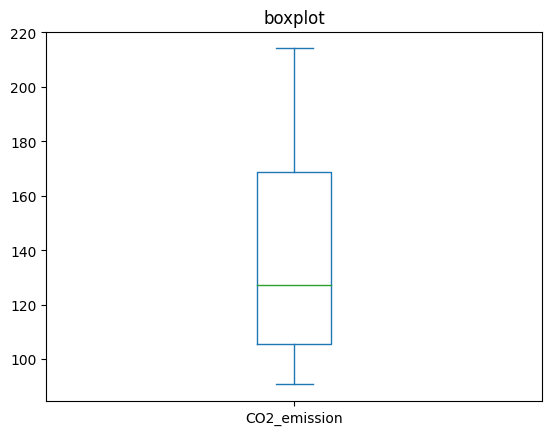

In [136]:
ax = Arg[['CO2_emission']].plot(kind='box', title='boxplot')
plt.show()

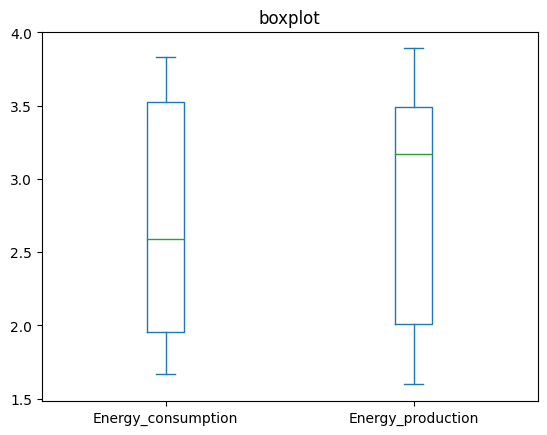

In [137]:
ax = Arg[['Energy_consumption', 'Energy_production']].plot(kind='box', title='boxplot')
plt.show()

In [18]:
print(Arg.isnull().sum())

Country                        0
Energy_type                    0
Year                           0
Energy_consumption             0
Energy_production              0
GDP                            0
Population                     0
Energy_intensity_per_capita    0
Energy_intensity_by_GDP        0
CO2_emission                   4
dtype: int64


In [19]:
ArgNu = Arg[Arg['CO2_emission'].isnull()]
ArgNu

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
48,Argentina,all_energy_types,1980,1.713088,1.597946,453.819,27951.93,61.286935,3.774827,NaN
49,Argentina,coal,1980,0.034096,0.008735,453.819,27951.93,61.286935,3.774827,NaN
50,Argentina,natural_gas,1980,0.368334,0.287280,453.819,27951.93,61.286935,3.774827,NaN
51,Argentina,petroleum_n_other_liquids,1980,1.102052,1.095156,453.819,27951.93,61.286935,3.774827,NaN


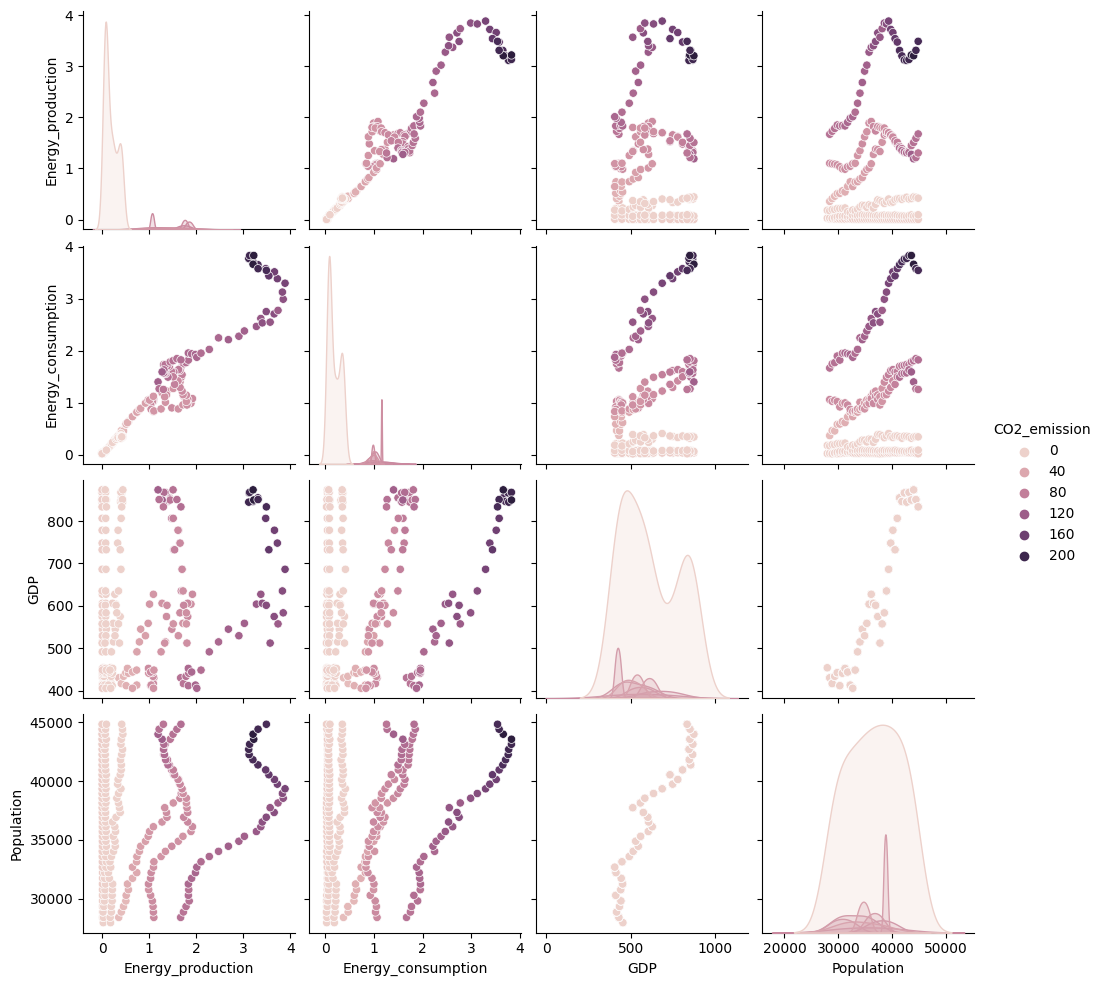

In [20]:
trimmed = Arg[['Energy_production', 'Energy_consumption', 'GDP', 'Population', 'CO2_emission']]
sns.pairplot(trimmed, hue="CO2_emission")

/tmp/ipykernel_41/2587755257.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Arg.corr()


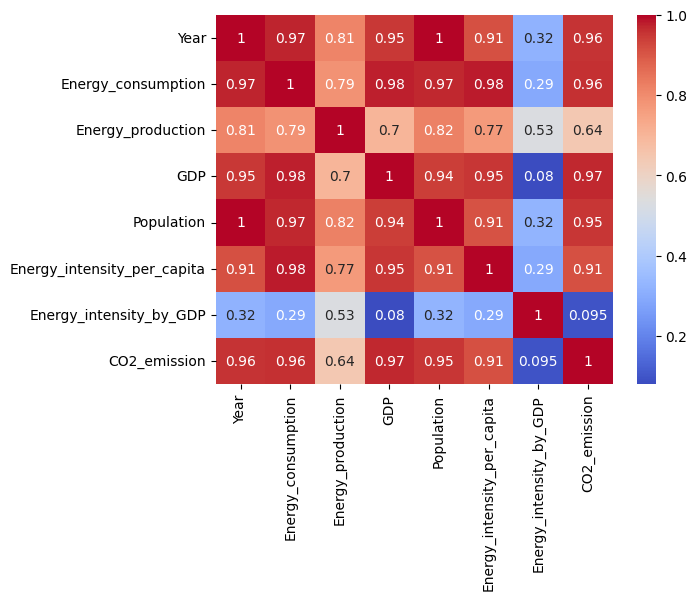

In [138]:
correlation_matrix = Arg.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

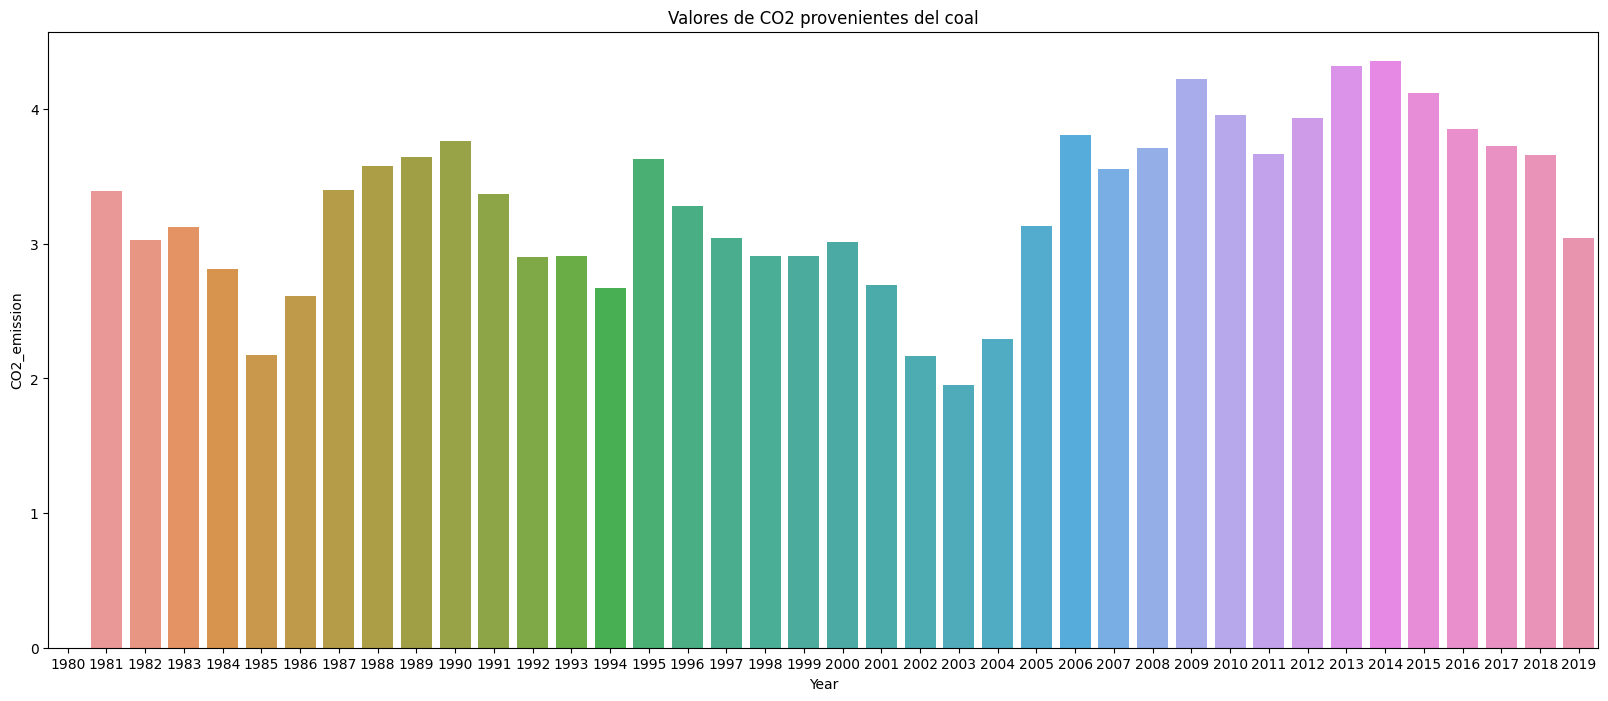

In [22]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Year', y = 'CO2_emission', data = Arg[Arg['Energy_type'] == 'coal']) 
plt.title('Valores de CO2 provenientes del coal')
plt.show()

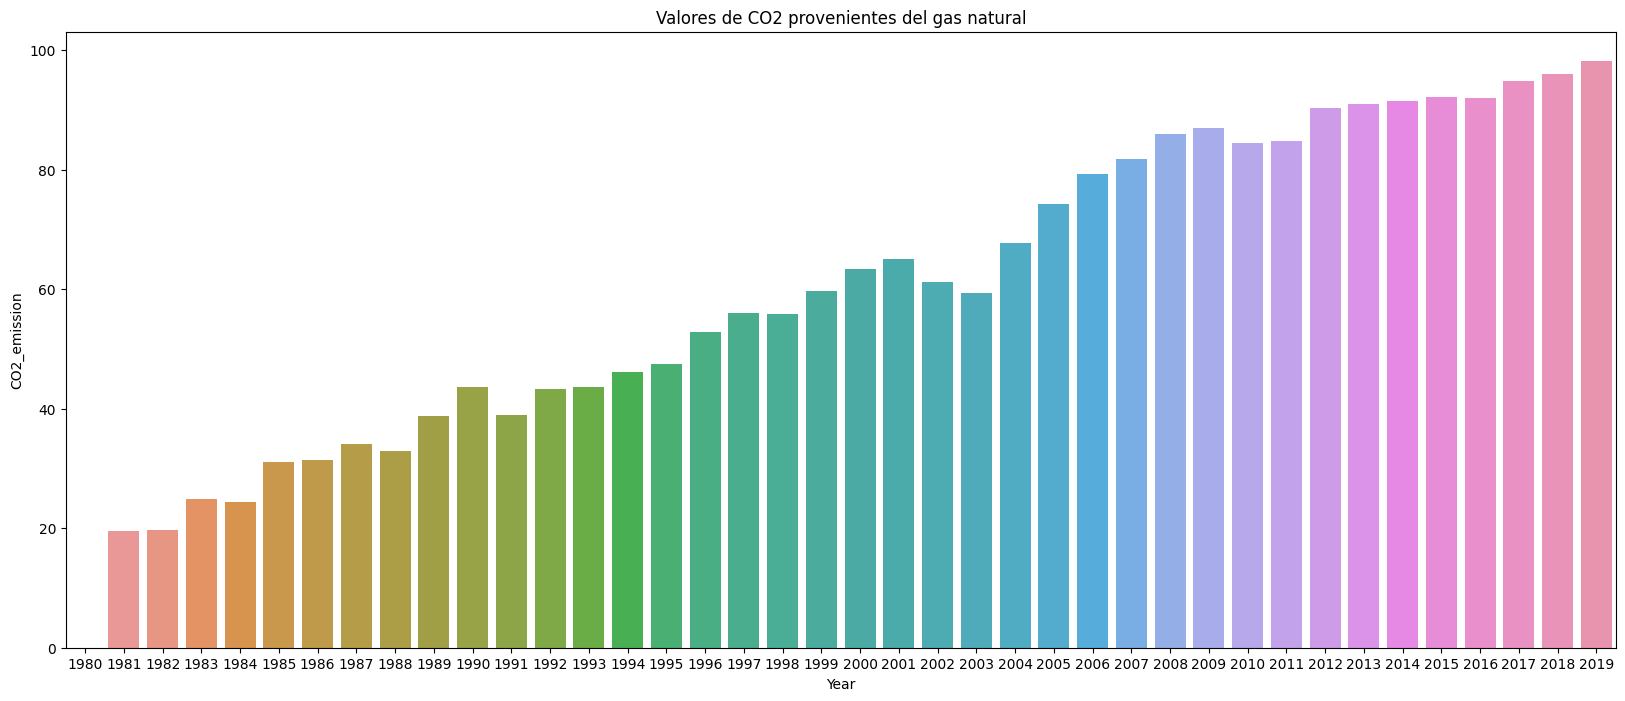

In [23]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Year', y = 'CO2_emission', data = Arg[Arg['Energy_type'] == 'natural_gas']) 
plt.title('Valores de CO2 provenientes del gas natural')
plt.show()

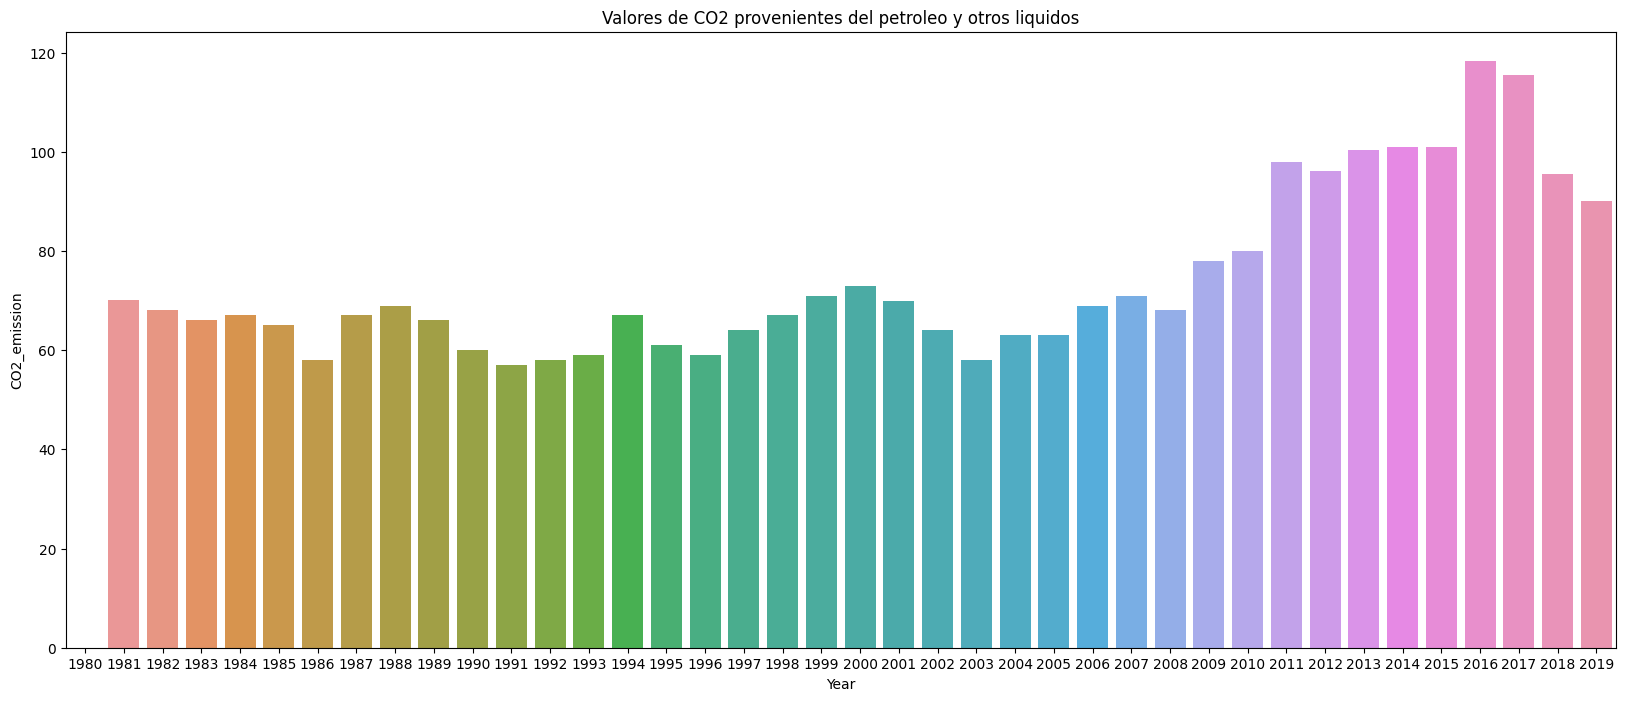

In [24]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Year', y = 'CO2_emission', data = Arg[Arg['Energy_type'] == 'petroleum_n_other_liquids']) 
plt.title('Valores de CO2 provenientes del petroleo y otros liquidos')
plt.show()

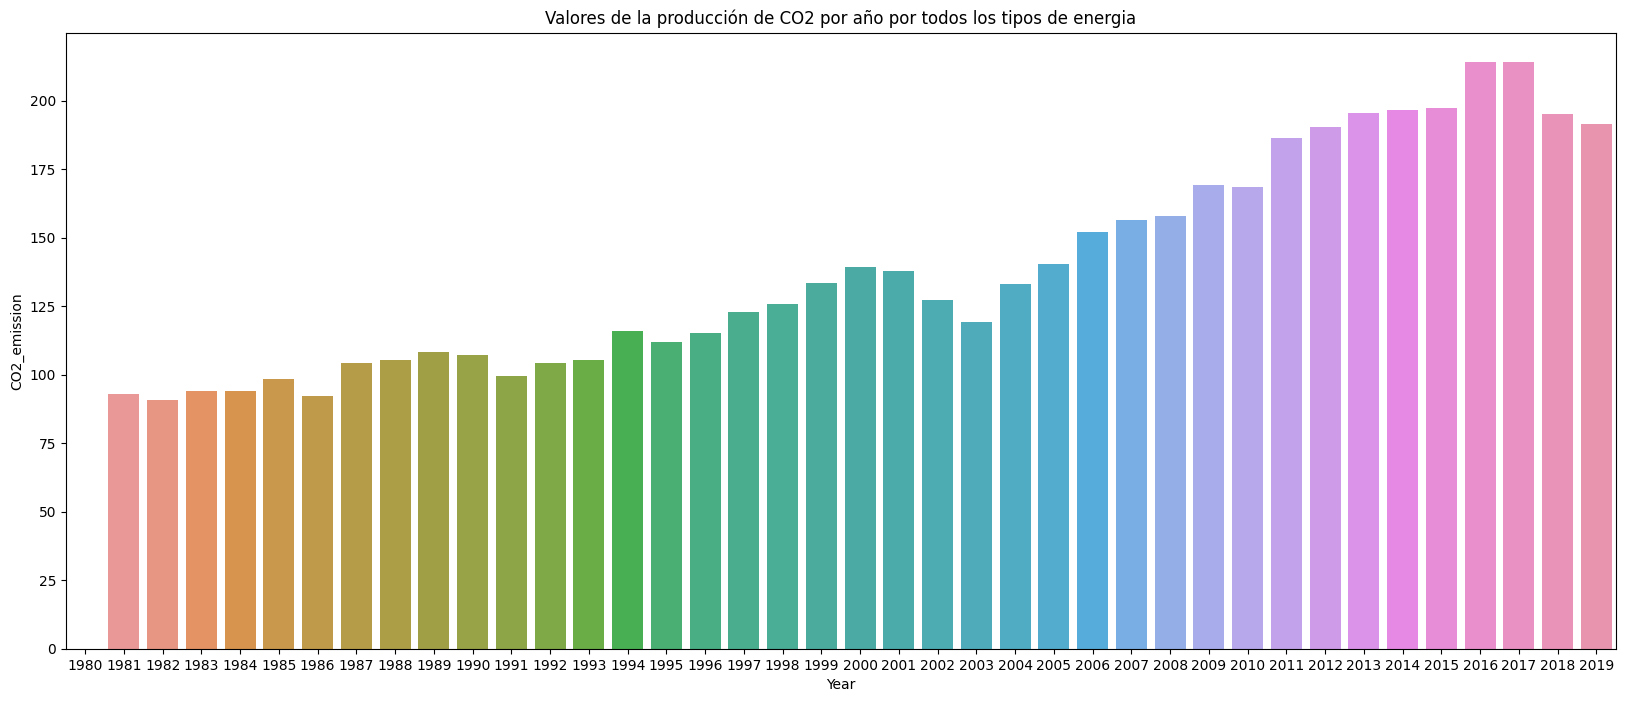

In [25]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Year', y = 'CO2_emission', data = Arg[Arg['Energy_type'] == 'all_energy_types']) 
plt.title('Valores de la producción de CO2 por año por todos los tipos de energia')
plt.show()

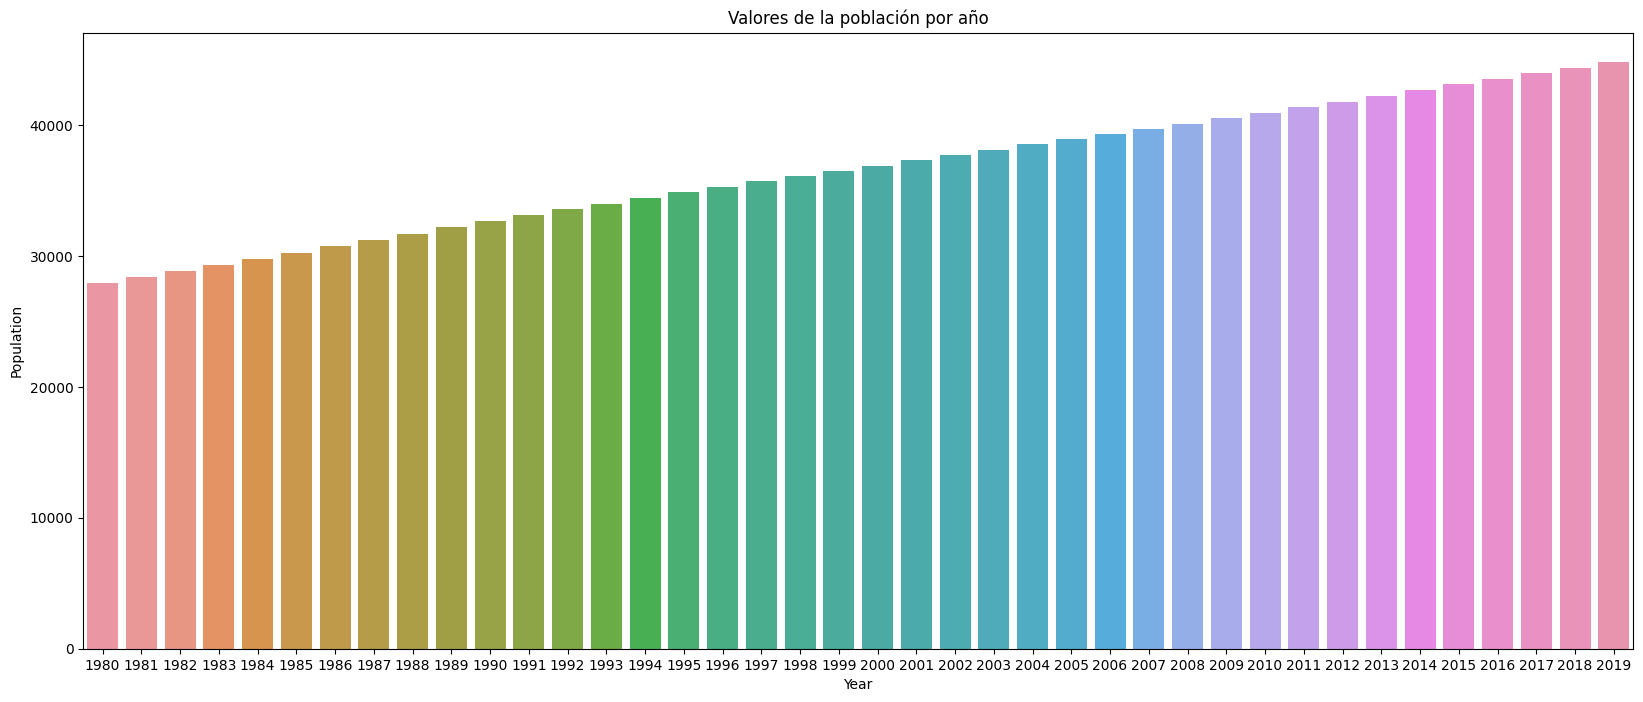

In [26]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Year', y = 'Population', data = Arg[Arg['Energy_type'] == 'all_energy_types']) 
plt.title('Valores de la población por año')
plt.show()

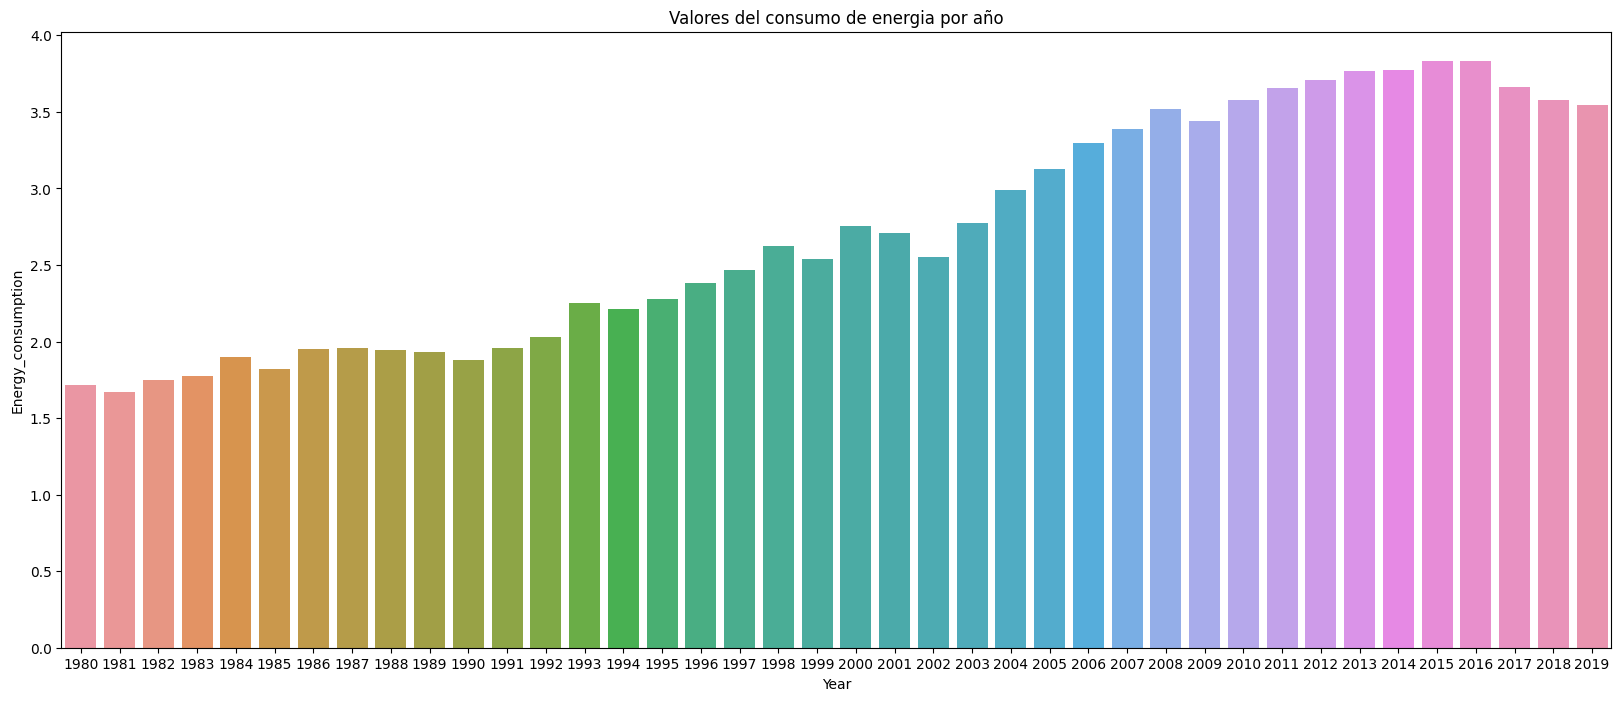

In [27]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Year', y = 'Energy_consumption', data = Arg[Arg['Energy_type'] == 'all_energy_types']) 
plt.title('Valores del consumo de energia por año')
plt.show()

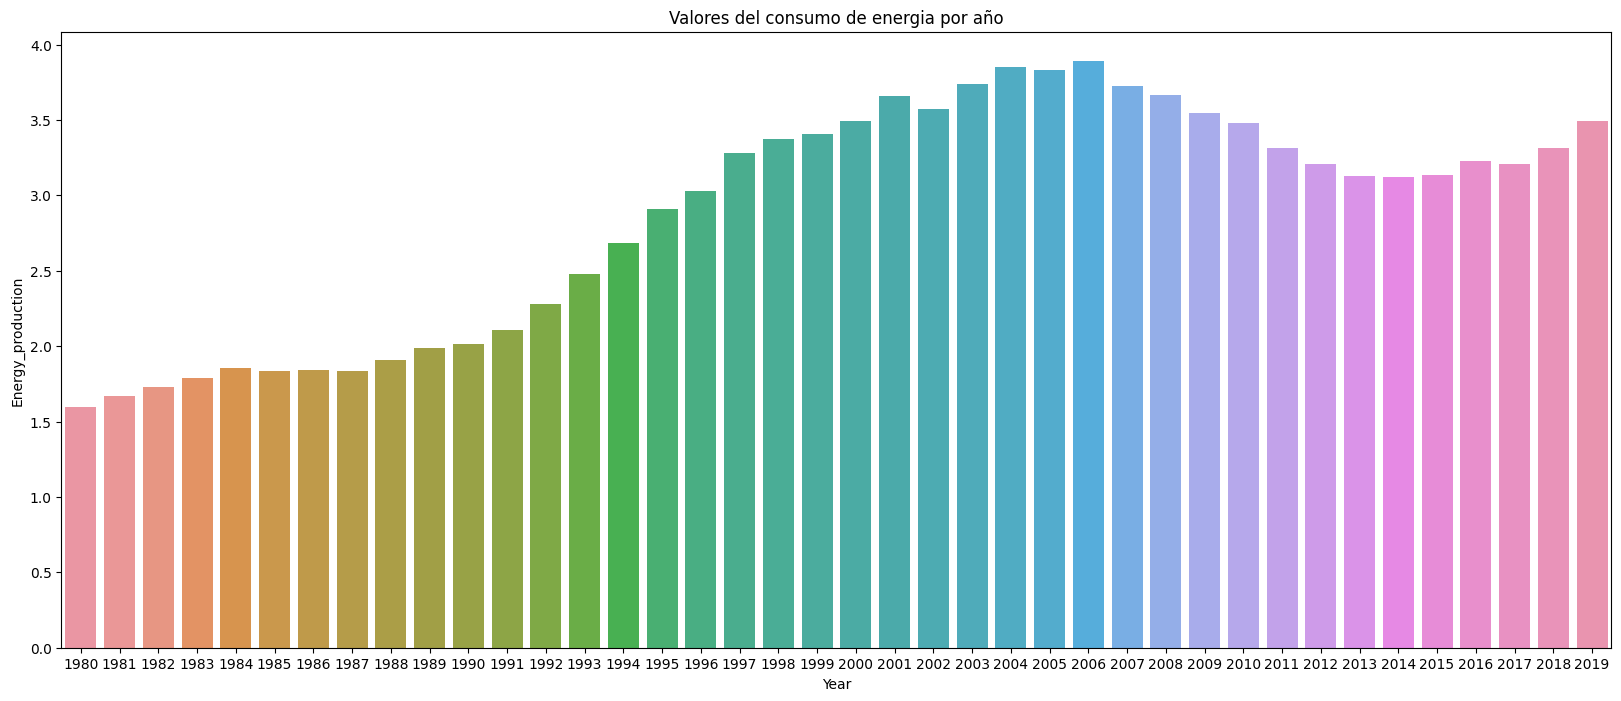

In [28]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Year', y = 'Energy_production', data = Arg[Arg['Energy_type'] == 'all_energy_types']) 
plt.title('Valores del consumo de energia por año')
plt.show()

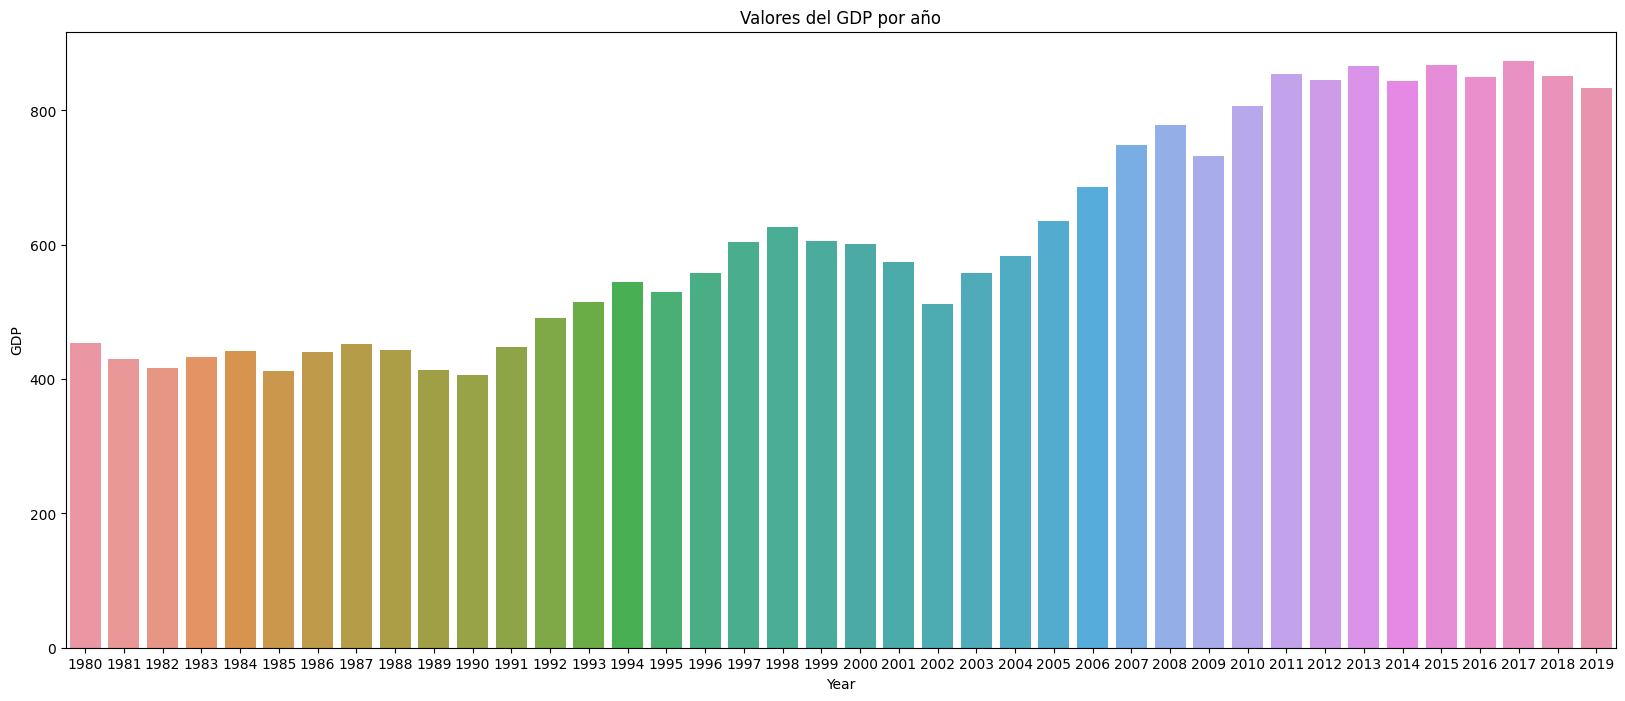

In [29]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Year', y = 'GDP', data = Arg[Arg['Energy_type'] == 'all_energy_types']) 
plt.title('Valores del GDP por año')
plt.show()

In [30]:
#Metodos de imputación : Lagrange, KNN con media

In [31]:
a = knn_u(Arg['Year'][(Arg['CO2_emission'].isnull()) & (Arg['Energy_type'] == 'coal')].values, Arg['Year'][(~Arg['CO2_emission'].isnull()) & (Arg['Energy_type'] == 'coal')].values, Arg['CO2_emission'][(~Arg['CO2_emission'].isnull()) & (Arg['Energy_type'] == 'coal')].values, 4)
print(a)

[3.08987861]


In [32]:
b = interpolation_u(Arg['Year'][(Arg['CO2_emission'].isnull()) & (Arg['Energy_type'] == 'coal')].values, Arg['Year'][(~Arg['CO2_emission'].isnull()) & (Arg['Energy_type'] == 'coal')].values, Arg['CO2_emission'][(~Arg['CO2_emission'].isnull()) & (Arg['Energy_type'] == 'coal')].values, 6)
print(b)

[3.69575986]


In [142]:
typesE = df['Energy_type'].unique()
typesE

array(['all_energy_types', 'coal', 'natural_gas',
       'petroleum_n_other_liquids', 'nuclear', 'renewables_n_other'],
      dtype=object)

In [34]:
results_type = {}
for ty in typesE:
    a =  knn_u(Arg['Year'][(Arg['CO2_emission'].isnull()) & (Arg['Energy_type'] == ty)].values, Arg['Year'][(~Arg['CO2_emission'].isnull()) & (Arg['Energy_type'] == ty)].values, Arg['CO2_emission'][(~Arg['CO2_emission'].isnull()) & (Arg['Energy_type'] == ty)].values, 4)
    results_type[ty] = a

for energy_type, resultado in results_type.items():
    print(f'Resultados para {energy_type}: {resultado}')

Resultados para all_energy_types: [92.99210452]
Resultados para coal: [3.08987861]
Resultados para natural_gas: [22.12829091]
Resultados para petroleum_n_other_liquids: [67.773935]
Resultados para nuclear: []
Resultados para renewables_n_other: []


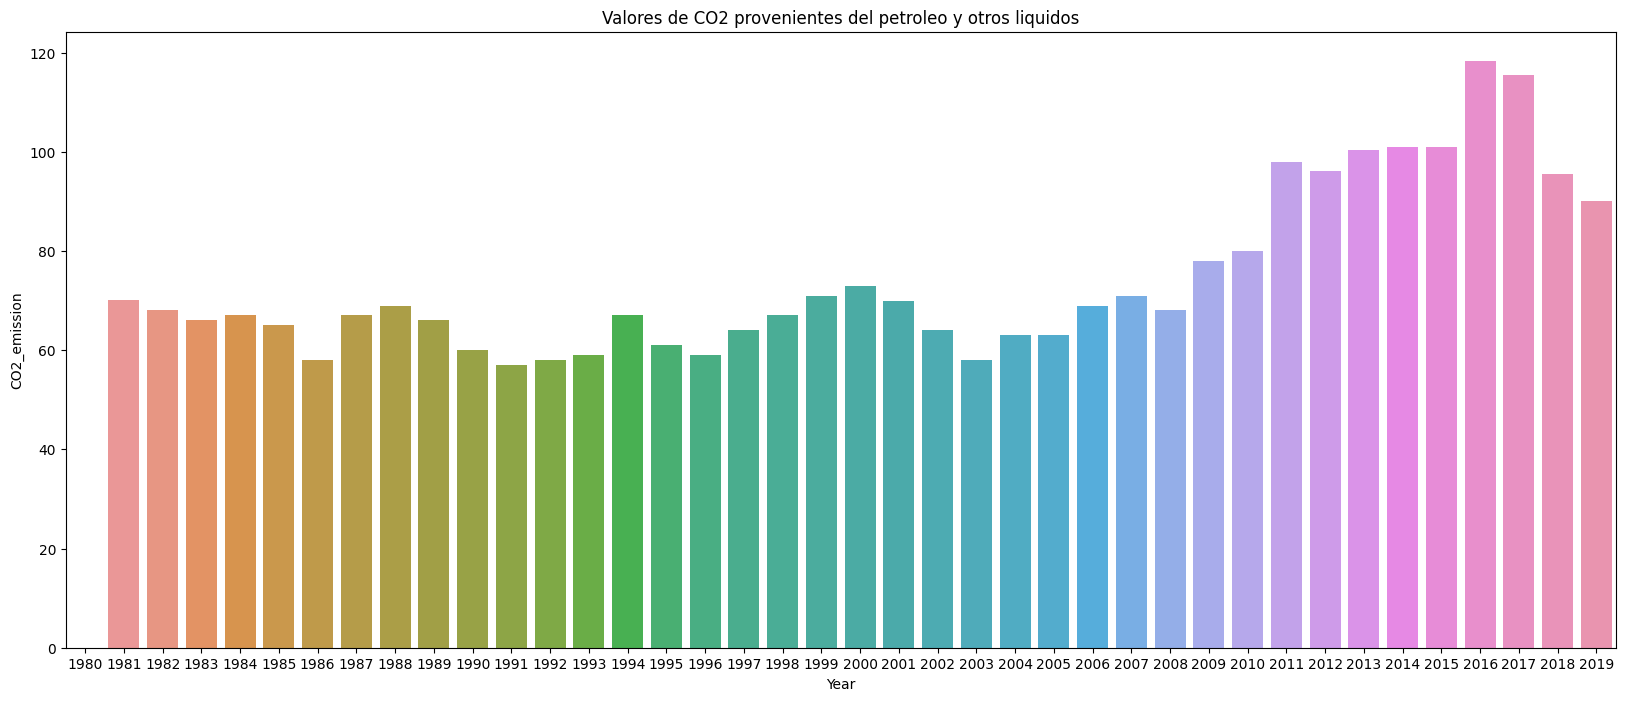

In [35]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Year', y = 'CO2_emission', data = Arg[Arg['Energy_type'] == 'petroleum_n_other_liquids']) 
plt.title('Valores de CO2 provenientes del petroleo y otros liquidos')
plt.show()

In [146]:
results_type = {}
for ty in typesE:
    a =  interpolation_u(Arg['Year'][(Arg['CO2_emission'].isnull()) & (Arg['Energy_type'] == ty)].values, Arg['Year'][(~Arg['CO2_emission'].isnull()) & (Arg['Energy_type'] == ty)].values, Arg['CO2_emission'][(~Arg['CO2_emission'].isnull()) & (Arg['Energy_type'] == ty)].values, 5)
    results_type[ty] = a
for energy_type, resultado in results_type.items():
    print(f'Resultados para {energy_type}: {resultado}')

Resultados para all_energy_types: [88.95736294]
Resultados para coal: [3.79005213]
Resultados para natural_gas: [20.19410225]
Resultados para petroleum_n_other_liquids: [67.9324191]
Resultados para nuclear: []
Resultados para renewables_n_other: []


In [37]:
columnas = ['Energy_consumption', 'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission']
cantidadNulls = df.groupby('Country')[columnas].apply(lambda x: x.isnull().sum()).reset_index(level=0)
cantidadNulls =  pd.DataFrame({'Country' : cantidadNulls['Country'], 'Total de nulos' : cantidadNulls.iloc[:, 1:].sum(axis=1)})
cantidadNulls = cantidadNulls.sort_values(by = 'Total de nulos', ascending=False)
cantidadNulls

,Country,Total de nulos
93,Hawaiian Trade Zone,1418
190,South Sudan,1300
80,"Germany, West",1292
79,"Germany, East",1292
71,Former Yugoslavia,1266
...,...,...
191,Spain,4
195,Sweden,4
196,Switzerland,4
219,United States,0


In [38]:
paisesElim = cantidadNulls.loc[cantidadNulls['Total de nulos'] > 168, 'Country']
paisesElim

93       Hawaiian Trade Zone
190              South Sudan
80             Germany, West
79             Germany, East
71         Former Yugoslavia
               ...          
110                 Kiribati
6        Antigua and Barbuda
172    Saint Kitts and Nevis
20                   Bermuda
49                    Cyprus
Name: Country, Length: 71, dtype: object

In [39]:
df = df.loc[~df['Country'].isin(paisesElim)]
df

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...
55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,Zimbabwe,nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000


In [40]:
df.isnull().sum()

Country                           0
Energy_type                       0
Year                              0
Energy_consumption             5467
Energy_production              5467
GDP                            5334
Population                       72
Energy_intensity_per_capita       0
Energy_intensity_by_GDP           0
CO2_emission                    632
dtype: int64

In [41]:
typesC = df['Country'].unique()
typesC

array(['World', 'Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Argentina', 'Australia', 'Austria', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo-Brazzaville', 'Congo-Kinshasa', 'Costa Rica',
       'Cuba', 'CÃ´te dâ\x80\x99Ivoire', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia, The', 'Ghana', 'Greece',
       'Grenada', 'Guadeloupe', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 

In [42]:
typesE = [x for x in typesE if x != 'all_energy_types']
typesE

['coal',
 'natural_gas',
 'petroleum_n_other_liquids',
 'nuclear',
 'renewables_n_other']

In [43]:
# Supongamos que tu diccionario tiene la siguiente estructura:
# results_by_country = {'Country1': result1, 'Country2': result2, ...}

for c in typesC:
    for ty in typesE:
        # Filtrar las filas con valores nulos para el país y tipo de energía actual
        null_mask = (df['CO2_emission'].isnull()) & (df['Energy_type'] == ty) & (df['Country'] == c)

        # Filtrar las filas sin valores nulos para el país y tipo de energía actual
        non_null_mask = (~df['CO2_emission'].isnull()) & (df['Energy_type'] == ty) & (df['Country'] == c)

        # Obtener los índices de las filas con valores nulos
        null_indices = df[null_mask].index
        
        imputed_values = knn_u(
        df['Year'][null_mask].values,
        df['Year'][non_null_mask].values,
        df['CO2_emission'][non_null_mask].values,
        4
    )

        # Actualizar los valores nulos en 'CO2_emission' con los resultados de la función
        df.loc[null_indices, 'CO2_emission'] = imputed_values
df

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...
55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,Zimbabwe,nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000


In [44]:
sum_co2_by_country = df[df['Energy_type'].isin(typesE)].groupby('Country')['CO2_emission'].sum()

In [45]:
for country in sum_co2_by_country.index:
    mask = (df['Country'] == country) & pd.isnull(df['CO2_emission']) & ~df['Energy_type'].isin(typesE)
    df.loc[mask, 'CO2_emission'] = sum_co2_by_country[country]

In [46]:
print(df.isnull().sum())

Country                           0
Energy_type                       0
Year                              0
Energy_consumption             5467
Energy_production              5467
GDP                            5334
Population                       72
Energy_intensity_per_capita       0
Energy_intensity_by_GDP           0
CO2_emission                      0
dtype: int64


In [47]:
cantidadNulls = df.groupby('Country',)['Population'].apply(lambda x: x.isnull().sum()).reset_index(level=0)
cantidadNulls = cantidadNulls.sort_values(by = 'Population', ascending=False)
cantidadNulls

,Country,Population
65,Hungary,42
113,Poland,30
0,Afghanistan,0
109,Papua New Guinea,0
103,Nigeria,0
...,...,...
54,Ghana,0
55,Greece,0
56,Grenada,0
57,Guadeloupe,0


In [48]:
Hgn = df[df['Country'] == 'Hungary']
Hgn

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
582,Hungary,all_energy_types,1980,1.168933,0.521931,NaN,10711.540,109.128359,0.000000,2387.164392
583,Hungary,coal,1980,0.227510,0.177160,NaN,10711.540,109.128359,0.000000,26.249415
584,Hungary,natural_gas,1980,0.350880,0.224595,NaN,10711.540,109.128359,0.000000,19.361213
585,Hungary,petroleum_n_other_liquids,1980,0.521554,0.119023,NaN,10711.540,109.128359,0.000000,27.644184
586,Hungary,nuclear,1980,0.000000,0.000000,NaN,10711.540,109.128359,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
54637,Hungary,coal,2019,0.087017,0.045387,309.9521,9770.737,108.211830,3.411202,9.423677
54638,Hungary,natural_gas,2019,0.367912,0.058079,309.9521,9770.737,108.211830,3.411202,19.169263
54639,Hungary,petroleum_n_other_liquids,2019,0.366582,0.048293,309.9521,9770.737,108.211830,3.411202,20.880865
54640,Hungary,nuclear,2019,0.155150,0.155150,309.9521,9770.737,108.211830,3.411202,0.000000


/tmp/ipykernel_41/213129493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Hgn.corr()


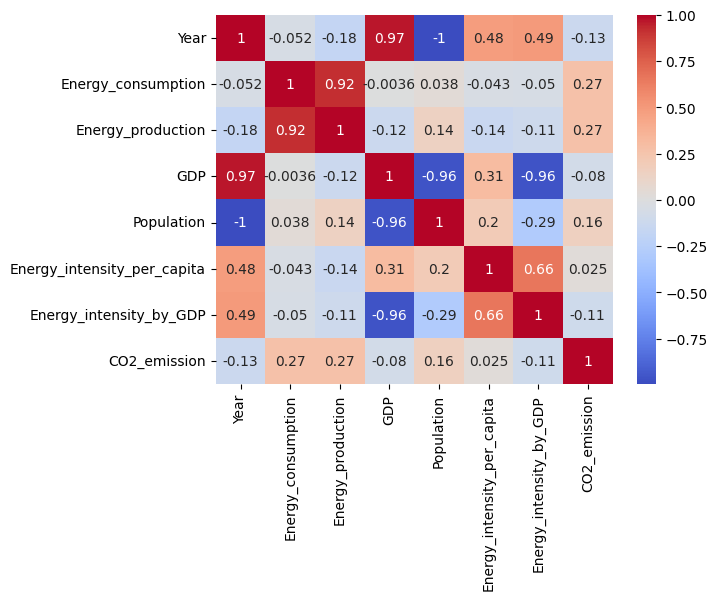

In [49]:
correlation_matrix = Hgn.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [105]:
def linearRegression_u(x_values, X, Y):
    results = []
    for x in x_values:
        mean_X = np.mean(X)
        mean_y = np.mean(Y)
        numerator = np.sum((X - mean_X) * (Y - mean_y))
        denominator = np.sum((X - mean_X)**2)
        b1 = numerator / denominator
        b0 = mean_y - b1 * mean_X
        ans = max(0, b0 + b1 * x)
        results.append(ans)
    return results

In [51]:
typesE.append('all_energy_types')

In [52]:
for c in typesC:
    for ty in typesE:
        # Filtrar las filas con valores nulos para el país y tipo de energía actual
        null_mask = (df['Population'].isnull()) & (df['Energy_type'] == ty) & (df['Country'] == c)

        # Filtrar las filas sin valores nulos para el país y tipo de energía actual
        non_null_mask = (~df['Population'].isnull()) & (df['Energy_type'] == ty) & (df['Country'] == c)

        # Obtener los índices de las filas con valores nulos
        null_indices = df[null_mask].index
        
        imputed_values = knn_u(
        df['Year'][null_mask].values,
        df['Year'][non_null_mask].values,
        df['Population'][non_null_mask].values,
        4
    )

        # Actualizar los valores nulos en 'CO2_emission' con los resultados de la función
        df.loc[null_indices, 'Population'] = imputed_values

In [53]:
print(df.isnull().sum())

Country                           0
Energy_type                       0
Year                              0
Energy_consumption             5467
Energy_production              5467
GDP                            5334
Population                        0
Energy_intensity_per_capita       0
Energy_intensity_by_GDP           0
CO2_emission                      0
dtype: int64


In [54]:
typesE.remove('all_energy_types')

In [55]:
cantidadNulls = df.groupby('Country',)['Energy_consumption'].apply(lambda x: x.isnull().sum()).reset_index(level=0)
cantidadNulls = cantidadNulls.sort_values(by = 'Energy_consumption', ascending=False)
cantidadNulls

,Country,Energy_consumption
0,Afghanistan,40
113,Poland,40
95,Mongolia,40
96,Morocco,40
97,Mozambique,40
...,...,...
133,Spain,0
132,South Korea,0
50,Finland,0
51,France,0


In [56]:
Pln = df[df['Country'] == 'Poland']
Pln

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
984,Poland,all_energy_types,1980,4.763041,4.311782,NaN,35614.33,133.739458,0.000000,13863.634400
985,Poland,coal,1980,3.593877,4.066769,NaN,35614.33,133.739458,0.000000,319.656349
986,Poland,natural_gas,1980,0.373274,0.200265,NaN,35614.33,133.739458,0.000000,19.238639
987,Poland,petroleum_n_other_liquids,1980,0.817811,0.016544,NaN,35614.33,133.739458,0.000000,42.482270
988,Poland,nuclear,1980,NaN,NaN,NaN,35614.33,133.739458,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
55039,Poland,coal,2019,2.080676,1.892921,1217.987,37963.62,112.998292,3.522061,195.522677
55040,Poland,natural_gas,2019,0.700337,0.153432,1217.987,37963.62,112.998292,3.522061,36.313635
55041,Poland,petroleum_n_other_liquids,2019,1.406306,0.043043,1217.987,37963.62,112.998292,3.522061,87.834002
55042,Poland,nuclear,2019,NaN,NaN,1217.987,37963.62,112.998292,3.522061,0.000000


/tmp/ipykernel_41/3762088973.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Pln.corr()


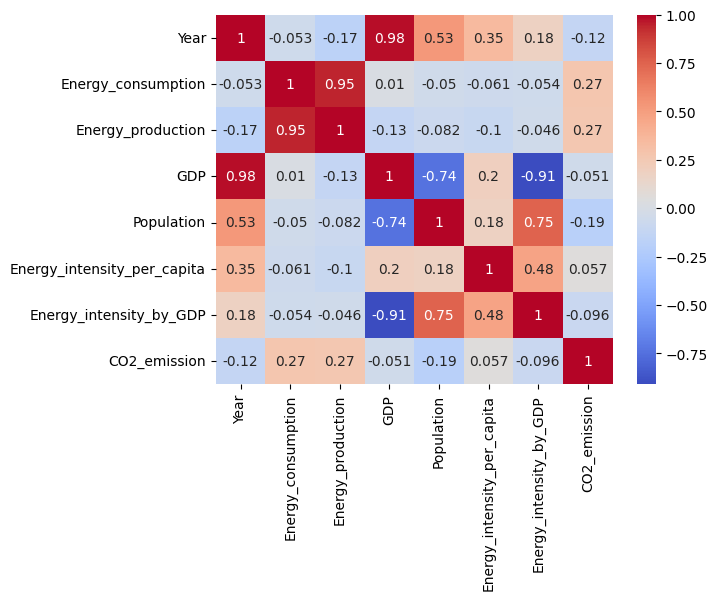

In [57]:
correlation_matrix = Pln.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [152]:
typesE = [x for x in typesE if x != 'all_energy_types']
typesE

['coal',
 'natural_gas',
 'petroleum_n_other_liquids',
 'nuclear',
 'renewables_n_other']

In [59]:
for c in typesC:
    for ty in typesE:
        # Filtrar las filas con valores nulos para el país y tipo de energía actual
        null_mask = (df['GDP'].isnull()) & (df['Energy_type'] == ty) & (df['Country'] == c)

        # Filtrar las filas sin valores nulos para el país y tipo de energía actual
        non_null_mask = (~df['GDP'].isnull()) & (df['Energy_type'] == ty) & (df['Country'] == c)

        # Obtener los índices de las filas con valores nulos
        null_indices = df[null_mask].index
        
        imputed_values = knn_u(
        df['Year'][null_mask].values,
        df['Year'][non_null_mask].values,
        df['GDP'][non_null_mask].values,
        4
    )

        # Actualizar los valores nulos en 'CO2_emission' con los resultados de la función
        df.loc[null_indices, 'GDP'] = imputed_values

In [60]:
for c in typesC:
    for ty in typesE:
        # Filtrar las filas con valores nulos para el país y tipo de energía actual
        null_mask = (df['Energy_consumption'].isnull()) & (df['Energy_type'] == ty) & (df['Country'] == c)

        # Filtrar las filas sin valores nulos para el país y tipo de energía actual
        non_null_mask = (~df['Energy_consumption'].isnull()) & (df['Energy_type'] == ty) & (df['Country'] == c)

        # Obtener los índices de las filas con valores nulos
        null_indices = df[null_mask].index
        
        imputed_values = knn_u(
        df['Year'][null_mask].values,
        df['Year'][non_null_mask].values,
        df['Energy_consumption'][non_null_mask].values,
        4
    )

        # Actualizar los valores nulos en 'CO2_emission' con los resultados de la función
        df.loc[null_indices, 'Energy_consumption'] = imputed_values

/home/jose_17/vev1/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jose_17/vev1/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [61]:
for c in typesC:
    for ty in typesE:
        # Filtrar las filas con valores nulos para el país y tipo de energía actual
        null_mask = (df['Energy_production'].isnull()) & (df['Energy_type'] == ty) & (df['Country'] == c)

        # Filtrar las filas sin valores nulos para el país y tipo de energía actual
        non_null_mask = (~df['Energy_production'].isnull()) & (df['Energy_type'] == ty) & (df['Country'] == c)

        # Obtener los índices de las filas con valores nulos
        null_indices = df[null_mask].index
        
        imputed_values = knn_u(
        df['Year'][null_mask].values,
        df['Year'][non_null_mask].values,
        df['Energy_production'][non_null_mask].values,
        4
    )

        # Actualizar los valores nulos en 'CO2_emission' con los resultados de la función
        df.loc[null_indices, 'Energy_production'] = imputed_values

In [62]:
print(df.isnull().sum())

Country                           0
Energy_type                       0
Year                              0
Energy_consumption             5360
Energy_production              5360
GDP                             889
Population                        0
Energy_intensity_per_capita       0
Energy_intensity_by_GDP           0
CO2_emission                      0
dtype: int64


In [63]:
cantidadNulls = df.groupby('Country',)['Energy_consumption'].apply(lambda x: x.isnull().sum()).reset_index(level=0)
cantidadNulls = cantidadNulls.sort_values(by = 'Energy_consumption', ascending=False)
cantidadNulls

,Country,Energy_consumption
0,Afghanistan,40
113,Poland,40
95,Mongolia,40
96,Morocco,40
97,Mozambique,40
...,...,...
132,South Korea,0
131,South Africa,0
50,Finland,0
51,France,0


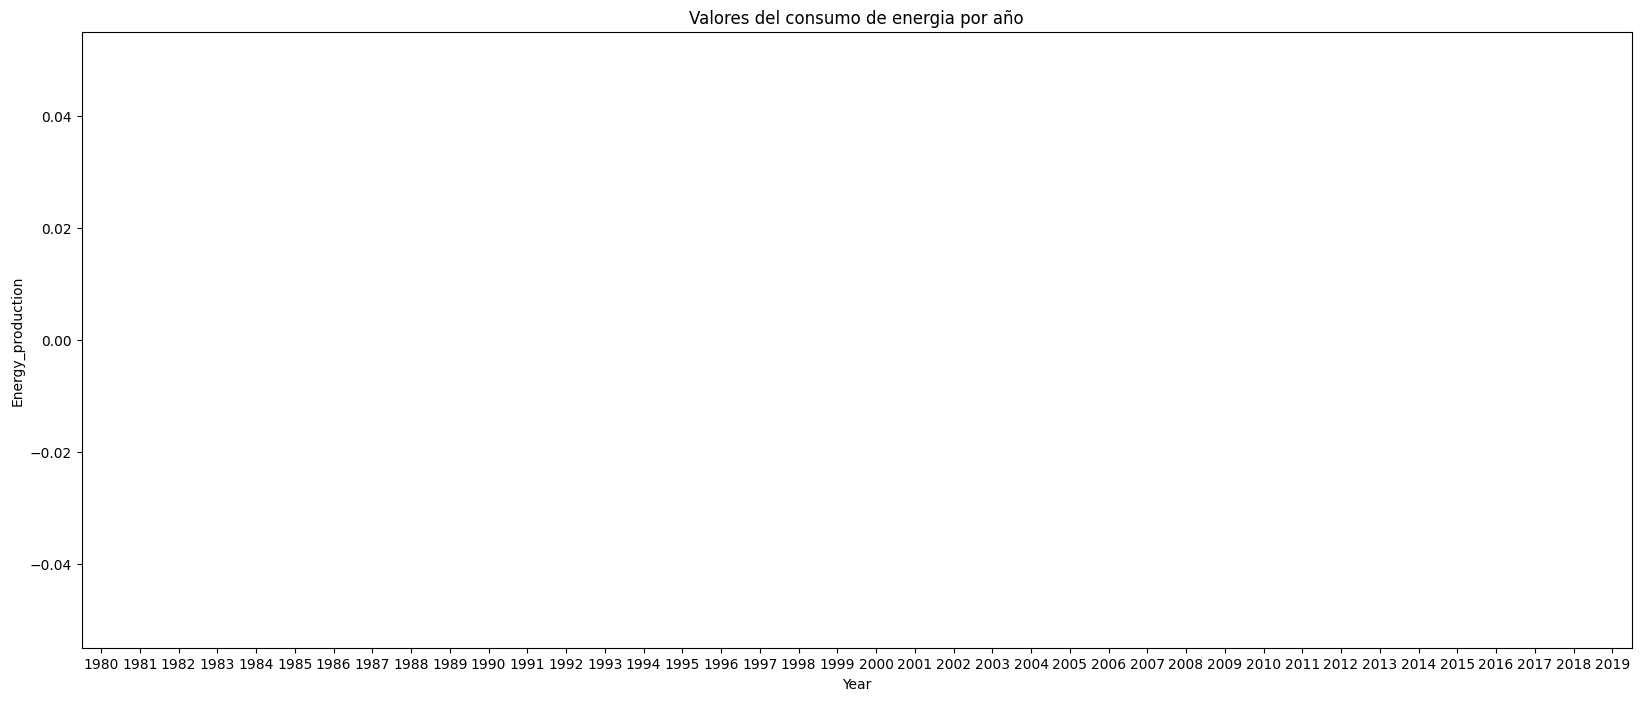

In [64]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Year', y = 'Energy_production', data = Pln[Pln['Energy_type'] == 'nuclear']) 
plt.title('Valores del consumo de energia por año')
plt.show()

In [65]:
df.loc[df['Energy_type'] == 'nuclear', 'Energy_consumption'] = df.loc[df['Energy_type'] == 'nuclear', 'Energy_consumption'].fillna(0)

In [66]:
df.loc[df['Energy_type'] == 'nuclear', 'Energy_production'] = df.loc[df['Energy_type'] == 'nuclear', 'Energy_consumption'].fillna(0)

In [67]:
print(df.isnull().sum())

Country                          0
Energy_type                      0
Year                             0
Energy_consumption               0
Energy_production                0
GDP                            889
Population                       0
Energy_intensity_per_capita      0
Energy_intensity_by_GDP          0
CO2_emission                     0
dtype: int64


In [68]:
sum_gdp_by_country = df[df['Energy_type'].isin(typesE)].groupby('Country')['GDP'].sum()

In [69]:
for country in sum_gdp_by_country.index:
    mask = (df['Country'] == country) & pd.isnull(df['GDP']) & ~df['Energy_type'].isin(typesE)
    df.loc[mask, 'GDP'] = sum_gdp_by_country[country]

In [70]:
print(df.isnull().sum())

Country                        0
Energy_type                    0
Year                           0
Energy_consumption             0
Energy_production              0
GDP                            0
Population                     0
Energy_intensity_per_capita    0
Energy_intensity_by_GDP        0
CO2_emission                   0
dtype: int64


In [71]:
#Queda visualizar los datos

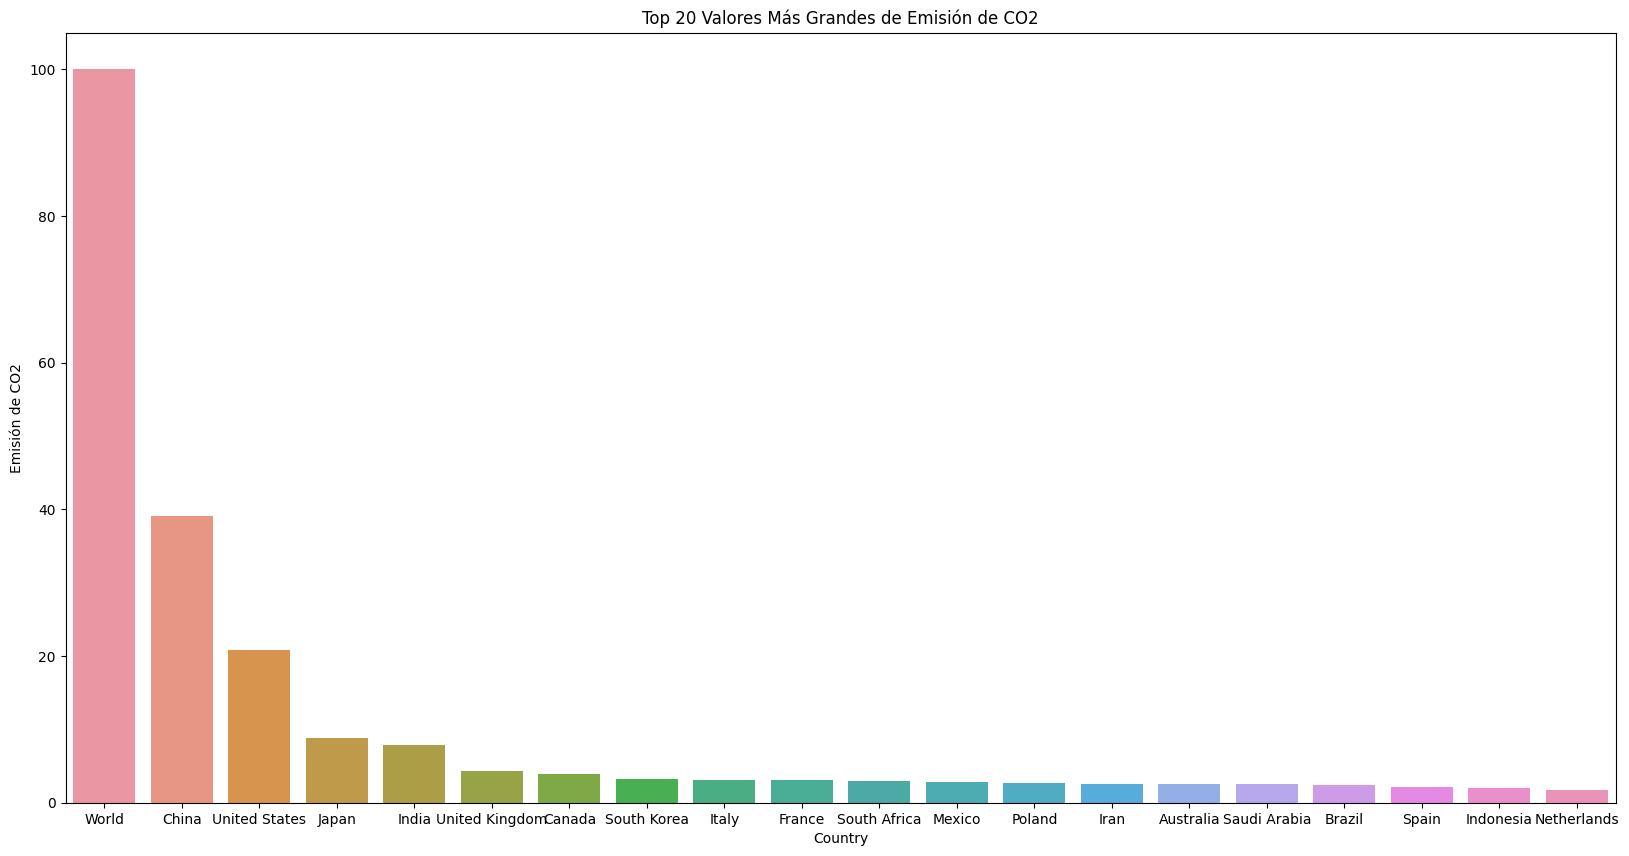

In [72]:
dff = df[df['Energy_type'] == 'all_energy_types']
dfa = dff.groupby('Country')['CO2_emission'].sum().reset_index()
dfa = dfa.sort_values(by = 'CO2_emission', ascending = False)

top20 = dfa.nlargest(20, 'CO2_emission')
porcentajestop20 = (top20['CO2_emission'] / top20['CO2_emission'].max()) * 100

plt.figure(figsize=(20, 10))
sns.barplot(x = 'Country', y = porcentajestop20, data = top20) 
plt.xlabel('Country')
plt.ylabel('Emisión de CO2')
plt.title('Top 20 Valores Más Grandes de Emisión de CO2')
plt.show()

In [73]:
dff = df[df['Energy_type'] == 'all_energy_types']
dfa = dff.groupby('Country')['CO2_emission'].sum().reset_index()
dfa['CO2_emission'].max()

1016796.856173038

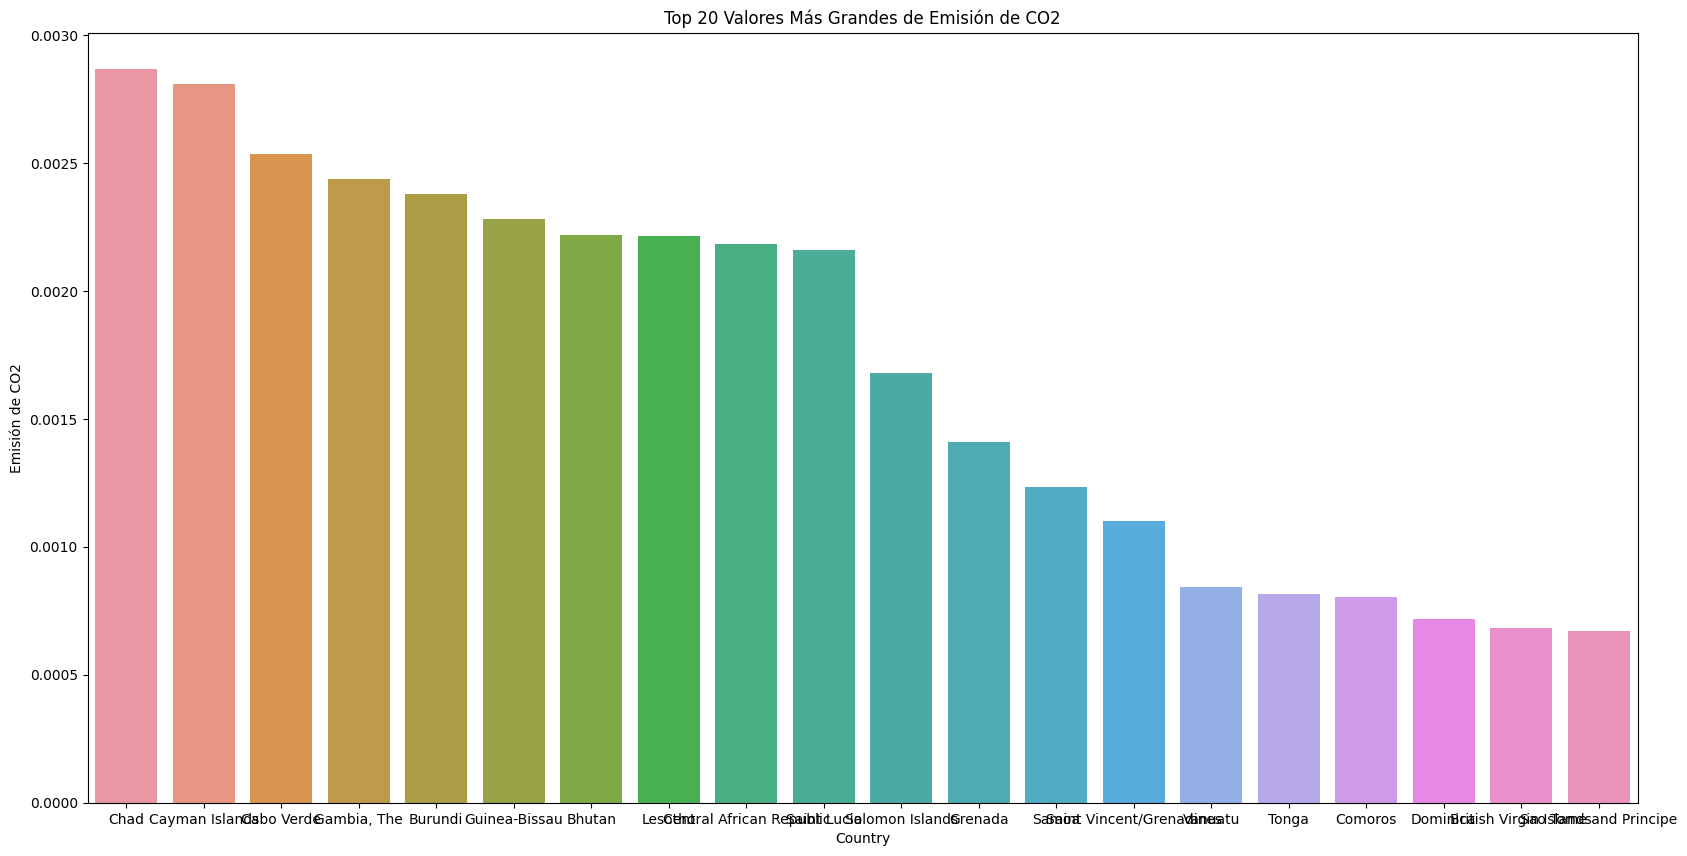

In [74]:
dff = df[df['Energy_type'] == 'all_energy_types']
dfa = dff.groupby('Country')['CO2_emission'].sum().reset_index()
#dfa = dfa.sort_values(by = 'CO2_emission', ascending = True)

top20 = dfa.nsmallest(20, 'CO2_emission')
top20 = top20.sort_values(by = 'CO2_emission', ascending = False)
porcentajestop20 = (top20['CO2_emission'] / dfa['CO2_emission'].max()) * 100

plt.figure(figsize=(20, 10))
sns.barplot(x = 'Country', y = porcentajestop20, data = top20) 
plt.xlabel('Country')
plt.ylabel('Emisión de CO2')
plt.title('Top 20 Valores Más Grandes de Emisión de CO2')
plt.show()

In [75]:
import geopandas as gpd
from zipfile import ZipFile

# Ruta al archivo zip descargado
zip_file_path = '/home/jose_17/ne_110m_admin_0_countries.zip'

# Carpeta de destino para extraer los archivos
extract_folder = '/home/jose_17/'

# Descomprimir el archivo zip
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Ruta al archivo .shp después de la extracción
shp_file_path = extract_folder + 'ne_110m_admin_0_countries.shp'

# Cargar el archivo .shp con GeoPandas
world = gpd.read_file(shp_file_path)

# Muestra la información de los continentes



In [76]:
shp_file_path = '/home/jose_17/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shp_file_path)
CyC = world[['SOVEREIGNT', 'CONTINENT']]
CyC = CyC.append({'SOVEREIGNT': 'World', 'CONTINENT': 'World'}, ignore_index=True)
CyC

/tmp/ipykernel_41/988554540.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CyC = CyC.append({'SOVEREIGNT': 'World', 'CONTINENT': 'World'}, ignore_index=True)


,SOVEREIGNT,CONTINENT
0,Fiji,Oceania
1,United Republic of Tanzania,Africa
2,Western Sahara,Africa
3,Canada,North America
4,United States of America,North America
...,...,...
173,Montenegro,Europe
174,Kosovo,Europe
175,Trinidad and Tobago,North America
176,South Sudan,Africa


In [77]:
dff = pd.merge(df, CyC, left_on='Country', right_on='SOVEREIGNT', how='left')

# Eliminar la columna 'SOVEREIGNT' si lo deseas
dff = dff.drop('SOVEREIGNT', axis=1)
dff

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,CONTINENT
0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130,World
1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188,World
2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377,World
3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565,World
4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000,World
...,...,...,...,...,...,...,...,...,...,...,...
39595,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869,Africa
39596,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000,Africa
39597,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890,Africa
39598,Zimbabwe,nuclear,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000,Africa


In [78]:
dfa = dff[(dff['Year'] == 2019) & (dff['Energy_type'] == 'all_energy_types')]
dfa['Country'] = dfa['Country'].replace('United States', 'United States of America')
dfa

/tmp/ipykernel_41/3748332722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['Country'] = dfa['Country'].replace('United States', 'United States of America')


,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,CONTINENT
38610,World,all_energy_types,2019,601.040490,611.508969,127690.247059,7.714631e+06,77.909168,4.707020,35584.933498,World
38616,Afghanistan,all_energy_types,2019,0.122748,0.055210,79.454600,3.805090e+04,3.225901,1.544888,9.391163,Asia
38622,Albania,all_energy_types,2019,0.110748,0.089082,38.268400,2.879920e+03,38.455319,2.893987,4.031302,Europe
38628,Algeria,all_energy_types,2019,2.643503,6.429790,509.066000,4.303040e+04,61.433374,5.192849,145.987969,Africa
38634,Angola,all_energy_types,2019,0.372428,3.510208,193.826000,3.184980e+04,11.693253,1.921454,17.644577,Africa
...,...,...,...,...,...,...,...,...,...,...,...
39570,Venezuela,all_energy_types,2019,2.447475,3.551700,190.147200,2.851585e+04,85.828574,12.871474,131.485055,South America
39576,Vietnam,all_energy_types,2019,3.509086,2.556372,915.504000,9.642590e+04,36.391525,3.832955,241.806422,Asia
39582,Yemen,all_energy_types,2019,0.159020,0.133273,53.083800,2.916220e+04,5.452938,2.995635,8.292505,Asia
39588,Zambia,all_energy_types,2019,0.207097,0.148004,247.181900,1.787385e+04,11.586567,0.837831,7.096290,Africa


AttributeError: 'NoneType' object has no attribute 'set_bbox_to_anchor'

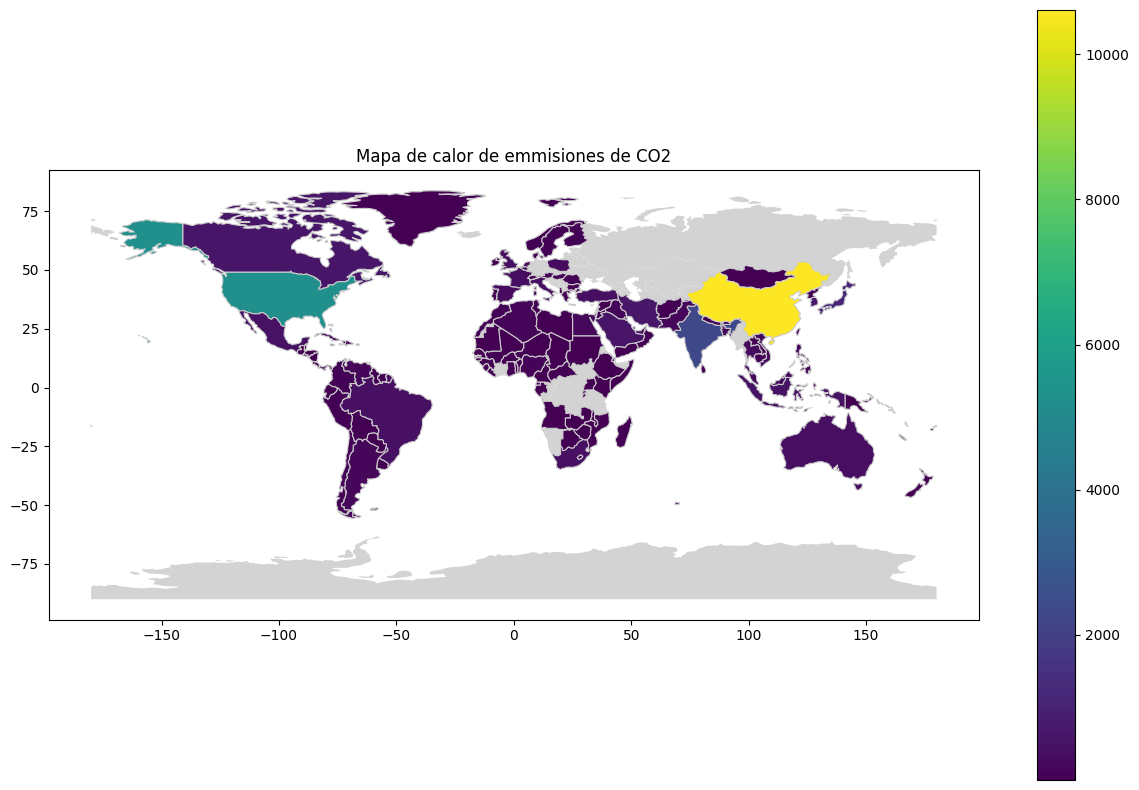

In [150]:
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Fusionar el DataFrame con el shapefile
merged = world.merge(dfa, left_on='SOVEREIGNT', right_on='Country', how='left')

# Configurar y trazar el mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('Mapa de calor de emmisiones de CO2')

# Trazar el mapa mundial
world.plot(ax=ax, color='lightgrey')

# Trazar los valores de tu DataFrame en el mapa
merged.plot(column='CO2_emission', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Mostrar la barra de leyenda
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))

# Mostrar la gráfica
plt.show()

In [80]:
dfa['CO2_per_capita'] = dfa['CO2_emission'] / dfa['Population']
dfa

/tmp/ipykernel_41/1786306629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['CO2_per_capita'] = dfa['CO2_emission'] / dfa['Population']


,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,CONTINENT,CO2_per_capita
38610,World,all_energy_types,2019,601.040490,611.508969,127690.247059,7.714631e+06,77.909168,4.707020,35584.933498,World,0.004613
38616,Afghanistan,all_energy_types,2019,0.122748,0.055210,79.454600,3.805090e+04,3.225901,1.544888,9.391163,Asia,0.000247
38622,Albania,all_energy_types,2019,0.110748,0.089082,38.268400,2.879920e+03,38.455319,2.893987,4.031302,Europe,0.001400
38628,Algeria,all_energy_types,2019,2.643503,6.429790,509.066000,4.303040e+04,61.433374,5.192849,145.987969,Africa,0.003393
38634,Angola,all_energy_types,2019,0.372428,3.510208,193.826000,3.184980e+04,11.693253,1.921454,17.644577,Africa,0.000554
...,...,...,...,...,...,...,...,...,...,...,...,...
39570,Venezuela,all_energy_types,2019,2.447475,3.551700,190.147200,2.851585e+04,85.828574,12.871474,131.485055,South America,0.004611
39576,Vietnam,all_energy_types,2019,3.509086,2.556372,915.504000,9.642590e+04,36.391525,3.832955,241.806422,Asia,0.002508
39582,Yemen,all_energy_types,2019,0.159020,0.133273,53.083800,2.916220e+04,5.452938,2.995635,8.292505,Asia,0.000284
39588,Zambia,all_energy_types,2019,0.207097,0.148004,247.181900,1.787385e+04,11.586567,0.837831,7.096290,Africa,0.000397


AttributeError: 'NoneType' object has no attribute 'set_bbox_to_anchor'

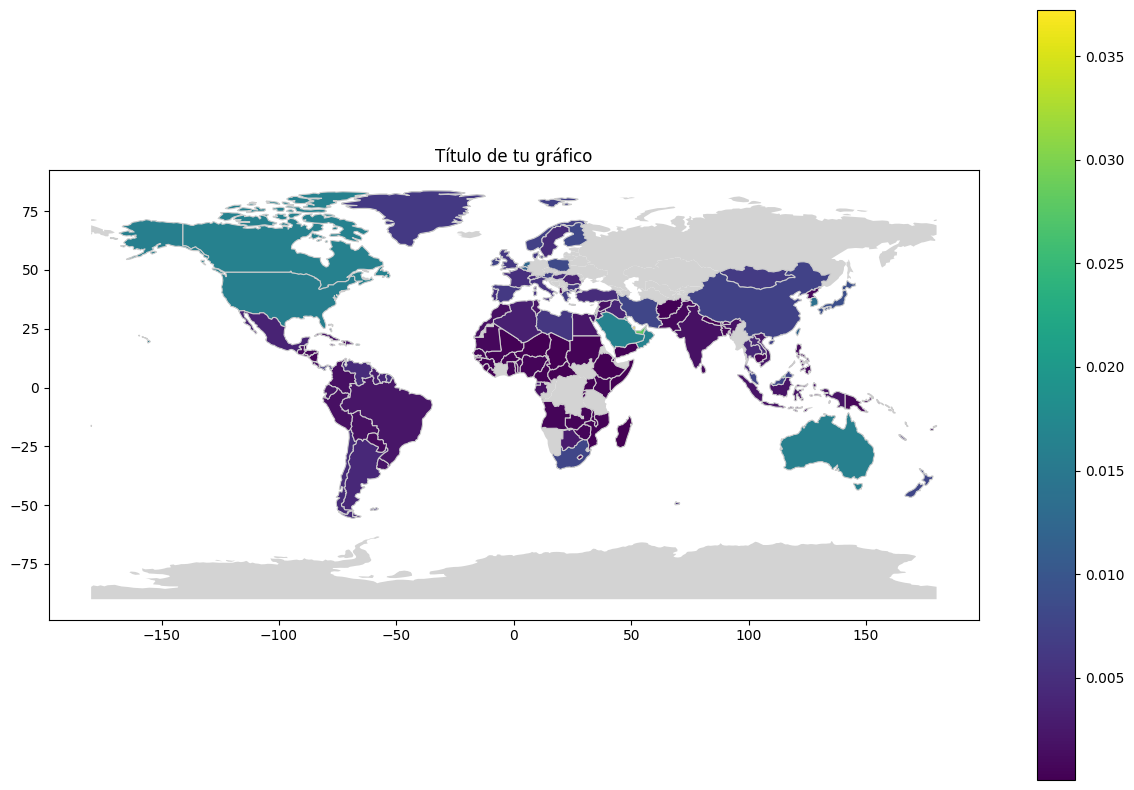

In [81]:
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Fusionar el DataFrame con el shapefile
merged = world.merge(dfa, left_on='SOVEREIGNT', right_on='Country', how='left')

# Configurar y trazar el mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('Título de tu gráfico')

# Trazar el mapa mundial
world.plot(ax=ax, color='lightgrey')

# Trazar los valores de tu DataFrame en el mapa
merged.plot(column='CO2_per_capita', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Mostrar la barra de leyenda
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))

# Mostrar la gráfica
plt.show()

AttributeError: 'NoneType' object has no attribute 'set_bbox_to_anchor'

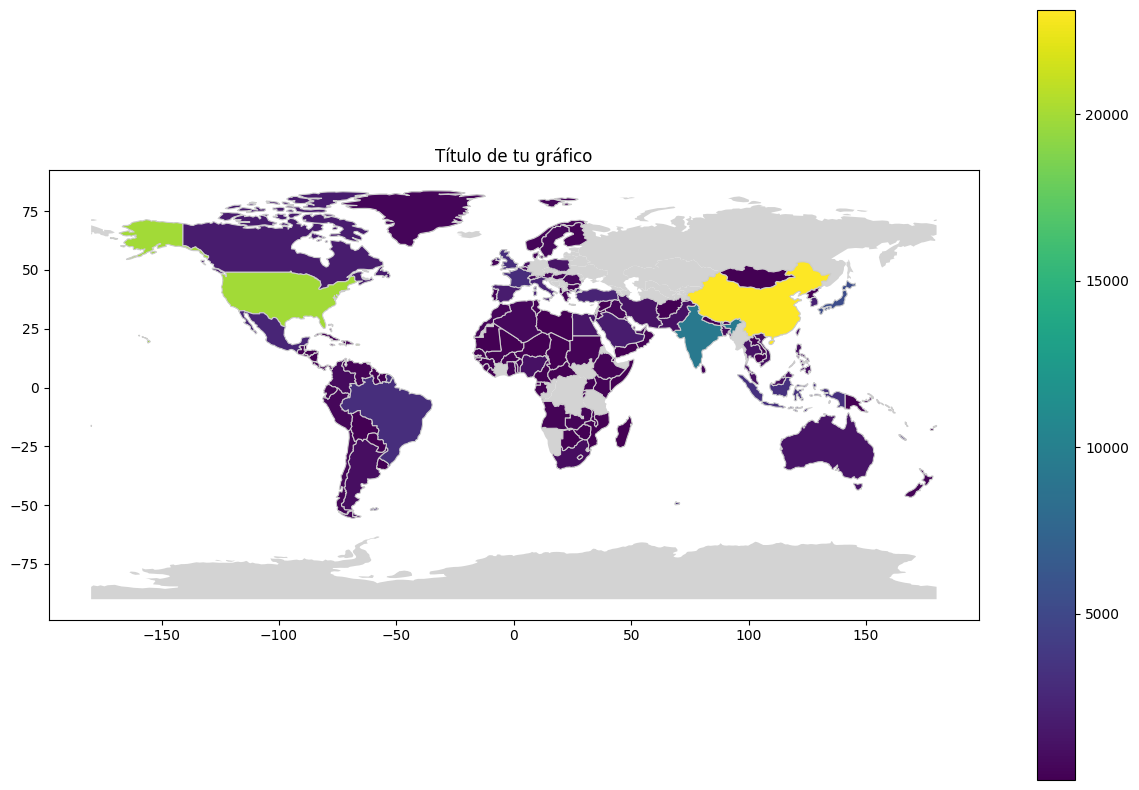

In [118]:
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Fusionar el DataFrame con el shapefile
merged = world.merge(dfa, left_on='SOVEREIGNT', right_on='Country', how='left')

# Configurar y trazar el mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('Título de tu gráfico')

# Trazar el mapa mundial
world.plot(ax=ax, color='lightgrey')

# Trazar los valores de tu DataFrame en el mapa
merged.plot(column='GDP', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Mostrar la barra de leyenda
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))

# Mostrar la gráfica
plt.show()

In [ ]:
#Predecir para 2020

In [102]:
from sklearn.linear_model import LinearRegression
df

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...
55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,Zimbabwe,nuclear,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000


In [99]:
typesE

['coal',
 'natural_gas',
 'petroleum_n_other_liquids',
 'nuclear',
 'renewables_n_other']

In [158]:
predictions_df_l = pd.DataFrame()

# Itera sobre cada tipo de energía
for ty in typesE:
    # Filtra el DataFrame por tipo de energía
    subset_df = df[df['Energy_type'] == ty]

    # Itera sobre cada país
    for country, group in subset_df.groupby('Country'):
        # Selecciona las variables independientes (años) y dependientes (CO2_emission)
        X = group['Year'].values
        y = group['CO2_emission'].values

        # Realiza la predicción para el año 2020 usando tu función
        predicted_emission = knn_u([2020], X, y, 4)[0]

        # Almacena los resultados en el DataFrame de predicciones
        predictions_df_l = pd.concat([
            predictions_df,
            pd.DataFrame({
                'Country': [country],
                'Energy_type': [ty],
                'Predicted_CO2_emission_2020': [predicted_emission]
            })
        ], ignore_index=True)

# Imprime el DataFrame con las predicciones
predictions_df_l = predictions_df_l.sort_values(by = 'Predicted_CO2_emission_2020', ascending=False)
predictions_df_l

,Country,Energy_type,Predicted_CO2_emission_2020
0,China,petroleum_n_other_liquids,1.616663e+07
1,Mexico,petroleum_n_other_liquids,2.690686e+06
2,Poland,natural_gas,1.757117e+06
3,South Korea,petroleum_n_other_liquids,1.792803e+05
4,Nigeria,natural_gas,1.612971e+05
...,...,...,...
435,Sao Tome and Principe,renewables_n_other,0.000000e+00
436,Reunion,renewables_n_other,0.000000e+00
437,Qatar,renewables_n_other,0.000000e+00
438,Puerto Rico,renewables_n_other,0.000000e+00


In [154]:
predictions_df = pd.DataFrame()

# Itera sobre cada tipo de energía
for ty in typesE:
    # Filtra el DataFrame por tipo de energía
    subset_df = df[df['Energy_type'] == ty]

    # Itera sobre cada país
    for country, group in subset_df.groupby('Country'):
        # Selecciona las variables independientes (años) y dependientes (CO2_emission)
        X = group['Year'].values
        y = group['CO2_emission'].values

        # Realiza la predicción para el año 2020 usando tu función
        predicted_emission = interpolation_u([2020], X, y, 4)[0]

        # Almacena los resultados en el DataFrame de predicciones
        predictions_df = pd.concat([
            predictions_df,
            pd.DataFrame({
                'Country': [country],
                'Energy_type': [ty],
                'Predicted_CO2_emission_2020': [predicted_emission]
            })
        ], ignore_index=True)

# Imprime el DataFrame con las predicciones
predictions_df = predictions_df.sort_values(by = 'Predicted_CO2_emission_2020', ascending=False)
predictions_df

,Country,Energy_type,Predicted_CO2_emission_2020
502,China,petroleum_n_other_liquids,1.616663e+07
594,Mexico,petroleum_n_other_liquids,2.690686e+06
394,Poland,natural_gas,1.757117e+06
651,South Korea,petroleum_n_other_liquids,1.792803e+05
380,Nigeria,natural_gas,1.612971e+05
...,...,...,...
404,Saint Lucia,natural_gas,0.000000e+00
405,Saint Pierre and Miquelon,natural_gas,0.000000e+00
406,Saint Vincent/Grenadines,natural_gas,0.000000e+00
407,Samoa,natural_gas,0.000000e+00
